In [1]:
import pandas as pd # import pandas for creating dataframe
import numpy as np  # for mathematical computation 
import matplotlib.pyplot as plt # for visualization
import seaborn as sns          # for visualization

In [2]:
laptop_data = pd.read_csv("laptop.csv") # reading the csv file

**Business Problem:
SmartTech Co. partners with our data science team to build a robust machine learning model for accurate laptop price prediction. Understanding feature influence and brand reputation helps strategically position products, ensuring competitiveness and meeting evolving market demands in the dynamic laptop industry.**

In [3]:
laptop_data # There are 1303 rows and 13 columns in dataset

Unnamed: 0.1  Unnamed: 0 Company            TypeName Inches  \
0                0         0.0   Apple           Ultrabook   13.3   
1                1         1.0   Apple           Ultrabook   13.3   
2                2         2.0      HP            Notebook   15.6   
3                3         3.0   Apple           Ultrabook   15.4   
4                4         4.0   Apple           Ultrabook   13.3   
...            ...         ...     ...                 ...    ...   
1298          1298      1298.0  Lenovo  2 in 1 Convertible     14   
1299          1299      1299.0  Lenovo  2 in 1 Convertible   13.3   
1300          1300      1300.0  Lenovo            Notebook     14   
1301          1301      1301.0      HP            Notebook   15.6   
1302          1302      1302.0    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 13 columns]

In [4]:
# copying the data 
df = laptop_data.copy()

In [5]:
df1 = df.copy()

In [6]:
df.head()

Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0.0   Apple  Ultrabook   13.3   
1             1         1.0   Apple  Ultrabook   13.3   
2             2         2.0      HP   Notebook   15.6   
3             3         3.0   Apple  Ultrabook   15.4   
4             4         4.0   Apple  Ultrabook   13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

         Price  
0   71378.6832  
1   47895.5232  
2   30636.0000  
3  135195.3360  
4   96095.8080

In [7]:
df.info() # structure of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
1303-1273 # no row with null value

30

In [9]:
df.duplicated().sum()

0

In [10]:
# droping unnecessary columns
col=['Unnamed: 0.1','Unnamed: 0']
df.drop(columns=col,axis=1,inplace=True)

In [11]:
df.describe()

Price
count    1273.000000
mean    59955.814073
std     37332.251005
min      9270.720000
25%     31914.720000
50%     52161.120000
75%     79333.387200
max    324954.720000

In [12]:
df['Company'].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [13]:
df['Inches'].value_counts() # unwanted value

Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [14]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [15]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [16]:
df['Ram'].value_counts()

Ram
8GB     601
4GB     367
16GB    194
6GB      40
12GB     25
2GB      22
32GB     17
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [17]:
df['Memory'].value_counts() # diffrent columns= ?

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [18]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [19]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [20]:
df['Weight'].value_counts()

Weight
2.2kg     111
2.1kg      57
2.4kg      43
2.3kg      41
2.5kg      37
         ... 
1.41kg      1
3.6kg       1
4.7kg       1
4.33kg      1
4.0kg       1
Name: count, Length: 189, dtype: int64

In [21]:
df['Price'].value_counts()

Price
79866.720    14
95850.720    14
58554.720    14
69210.720    11
63882.720    11
             ..
16197.120     1
40439.520     1
98994.240     1
61485.120     1
28992.312     1
Name: count, Length: 777, dtype: int64

In [22]:
df

Company            TypeName Inches  \
0      Apple           Ultrabook   13.3   
1      Apple           Ultrabook   13.3   
2         HP            Notebook   15.6   
3      Apple           Ultrabook   15.4   
4      Apple           Ultrabook   13.3   
...      ...                 ...    ...   
1298  Lenovo  2 in 1 Convertible     14   
1299  Lenovo  2 in 1 Convertible   13.3   
1300  Lenovo            Notebook     14   
1301      HP            Notebook   15.6   
1302    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 11 columns]

In [23]:
df.replace('?', pd.NA, inplace=True)

In [24]:
df['Memory'].value_counts() # ? marks is replace null value

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [25]:
df['Inches'].value_counts()

Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [26]:
# missing value
df.isnull().sum()

Company             30
TypeName            30
Inches              31
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              31
Gpu                 30
OpSys               30
Weight              31
Price               30
dtype: int64

In [27]:
df

Company            TypeName Inches  \
0      Apple           Ultrabook   13.3   
1      Apple           Ultrabook   13.3   
2         HP            Notebook   15.6   
3      Apple           Ultrabook   15.4   
4      Apple           Ultrabook   13.3   
...      ...                 ...    ...   
1298  Lenovo  2 in 1 Convertible     14   
1299  Lenovo  2 in 1 Convertible   13.3   
1300  Lenovo            Notebook     14   
1301      HP            Notebook   15.6   
1302    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 11 columns]

# converting variable data types

In [28]:
# converting Inches to desire data type 
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce') # Now the Inches column contains float values

In [29]:
df['Weight'] = pd.to_numeric(df['Weight'].str.replace('kg', ''), errors='coerce') # converting weight to float value

In [30]:
df['Ram'] = pd.to_numeric(df['Ram'].str.replace('GB', ''), errors='coerce') # changing ram into float

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   float64
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(4), object(7)
memory usage: 112.1+ KB


In [32]:
df.describe()

Inches          Ram       Weight          Price
count  1272.000000  1273.000000  1272.000000    1273.000000
mean     15.130818     8.462687     2.077618   59955.814073
std       1.954436     5.564408     0.807808   37332.251005
min      10.100000     1.000000     0.000200    9270.720000
25%      14.000000     4.000000     1.500000   31914.720000
50%      15.600000     8.000000     2.040000   52161.120000
75%      15.600000     8.000000     2.320000   79333.387200
max      35.600000    64.000000    11.100000  324954.720000

In [33]:
# Rename the Weight column to Weight_kg
df.rename(columns={'Weight': 'Weight_kg'}, inplace=True)

In [34]:
df   # REnameing the columns

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8.0            128GB SSD   
1                     Intel Core i5 1.8GHz   8.0  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8.0            256GB SSD   
3                     Intel Core i7 2.7GHz  16.0            512GB SSD   
4                     Intel Core i5 3.1GHz   8.0            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4.0            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16.0            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2.0   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6.0              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4.0            500GB HDD   

                               Gpu       OpSys  Weight_kg        Price  
0     Intel Iris Plus Graphics 640       macOS       1.37   71378.6832  
1           Intel HD Graphics 6000       macOS       1.34   47895.5232  
2            Intel HD Graphics 620       No OS       1.86   30636.0000  
3               AMD Radeon Pro 455       macOS       1.83  135195.3360  
4     Intel Iris Plus Graphics 650       macOS       1.37   96095.8080  
...                            ...         ...        ...          ...  
1298         Intel HD Graphics 520  Windows 10       1.80   33992.6400  
1299         Intel HD Graphics 520  Windows 10       1.30   79866.7200  
1300             Intel HD Graphics  Windows 10       1.50   12201.1200  
1301            AMD Radeon R5 M330  Windows 10       2.19   40705.9200  
1302             Intel HD Graphics  Windows 10       2.20   19660.3200  

[1303 rows x 11 columns]

In [35]:
df['Price'].describe()

count      1273.000000
mean      59955.814073
std       37332.251005
min        9270.720000
25%       31914.720000
50%       52161.120000
75%       79333.387200
max      324954.720000
Name: Price, dtype: float64

In [36]:
df.isnull().sum()

Company             30
TypeName            30
Inches              31
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              31
Gpu                 30
OpSys               30
Weight_kg           31
Price               30
dtype: int64

In [37]:
df.drop_duplicates(keep='first',inplace=True)
df                                           # duplicate rows are treated hence after droping duplicate row there are 1245 row.

Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1269    Asus            Notebook    15.6   
1270  Lenovo  2 in 1 Convertible    14.0   
1271  Lenovo  2 in 1 Convertible    13.3   
1272  Lenovo            Notebook    14.0   
1273      HP            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1269                                    1366x768   
1270   IPS Panel Full HD / Touchscreen 1920x1080   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1272                                    1366x768   
1273                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8.0            128GB SSD   
1                     Intel Core i5 1.8GHz   8.0  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8.0            256GB SSD   
3                     Intel Core i7 2.7GHz  16.0            512GB SSD   
4                     Intel Core i5 3.1GHz   8.0            256GB SSD   
...                                    ...   ...                  ...   
1269            Intel Core i7 6500U 2.5GHz   4.0            500GB HDD   
1270            Intel Core i7 6500U 2.5GHz   4.0            128GB SSD   
1271            Intel Core i7 6500U 2.5GHz  16.0            512GB SSD   
1272  Intel Celeron Dual Core N3050 1.6GHz   2.0   64GB Flash Storage   
1273            Intel Core i7 6500U 2.5GHz   6.0              1TB HDD   

                               Gpu       OpSys  Weight_kg        Price  
0     Intel Iris Plus Graphics 640       macOS       1.37   71378.6832  
1           Intel HD Graphics 6000       macOS       1.34   47895.5232  
2            Intel HD Graphics 620       No OS       1.86   30636.0000  
3               AMD Radeon Pro 455       macOS       1.83  135195.3360  
4     Intel Iris Plus Graphics 650       macOS       1.37   96095.8080  
...                            ...         ...        ...          ...  
1269           Nvidia GeForce 920M  Windows 10       2.20   38378.6496  
1270         Intel HD Graphics 520  Windows 10       1.80   33992.6400  
1271         Intel HD Graphics 520  Windows 10       1.30   79866.7200  
1272             Intel HD Graphics  Windows 10       1.50   12201.1200  
1273            AMD Radeon R5 M330  Windows 10       2.19   40705.9200  

[1245 rows x 11 columns]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


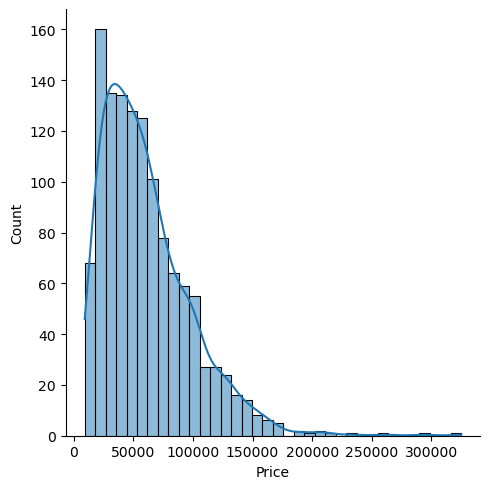

In [38]:
sns.displot(df['Price'],kde=True) # Distribution is positively skewed

In [39]:
pd.crosstab(df['Company'],columns='count')

col_0      count
Company         
Acer         101
Apple         21
Asus         149
Chuwi          3
Dell         281
Fujitsu        2
Google         3
HP           260
Huawei         2
LG             3
Lenovo       282
MSI           53
Mediacom       7
Microsoft      6
Razer          7
Samsung        9
Toshiba       47
Vero           4
Xiaomi         4

<Axes: xlabel='Company', ylabel='count'>

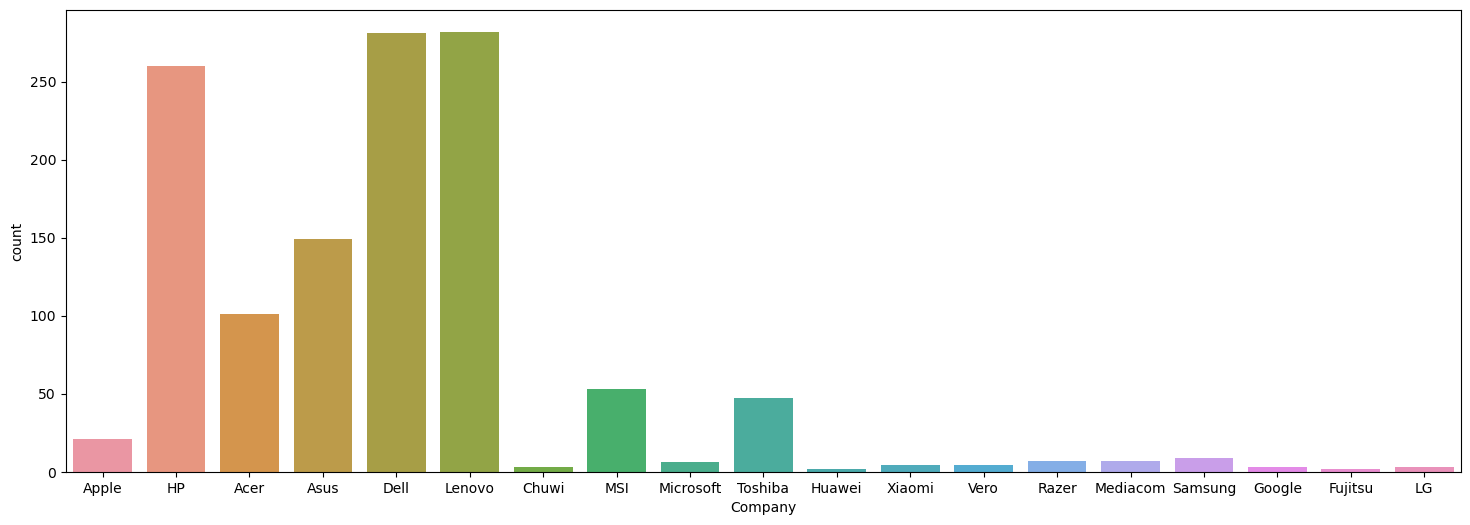

In [40]:
plt.figure(figsize=(18,6))
sns.countplot(x=df['Company'])

Above countplot show that lenovo has highest market share followed by dell and Fijitsu has very low market share followed by lg and google

<Axes: xlabel='Company', ylabel='Price'>

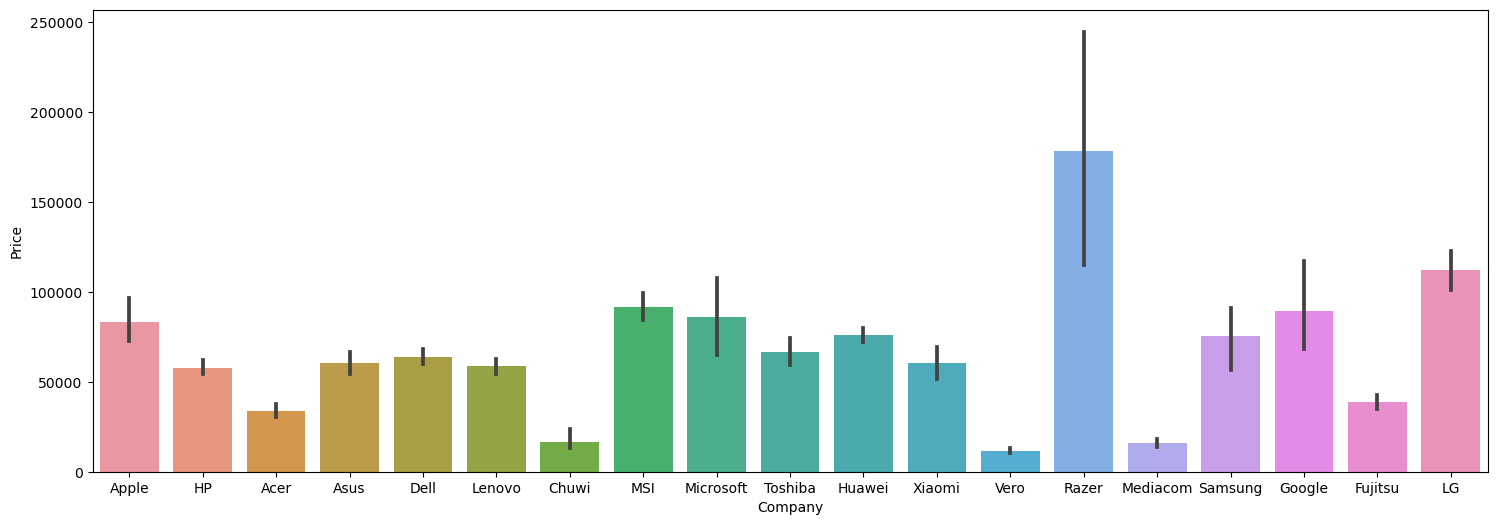

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(x=df['Company'],y=df['Price'])


/*** Above graph clearly show that there is influence of company on deciding laptop price if we see lesser known brand has low price compare to well know brand(except -Razer) ***/ Hence we go no retain this on model selection***/

In [42]:
pd.crosstab(df['TypeName'],columns='count')

col_0               count
TypeName                 
2 in 1 Convertible    112
Gaming                203
Netbook                22
Notebook              689
Ultrabook             189
Workstation            29

Text(0.5, 1.0, 'Frequency of types of laptop sold')

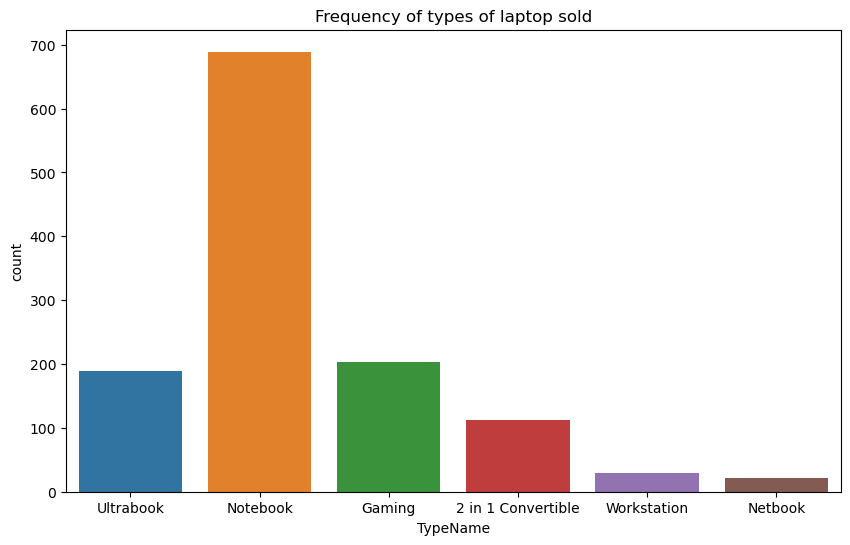

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['TypeName'])
plt.title('Frequency of types of laptop sold')

<Axes: xlabel='TypeName', ylabel='Price'>

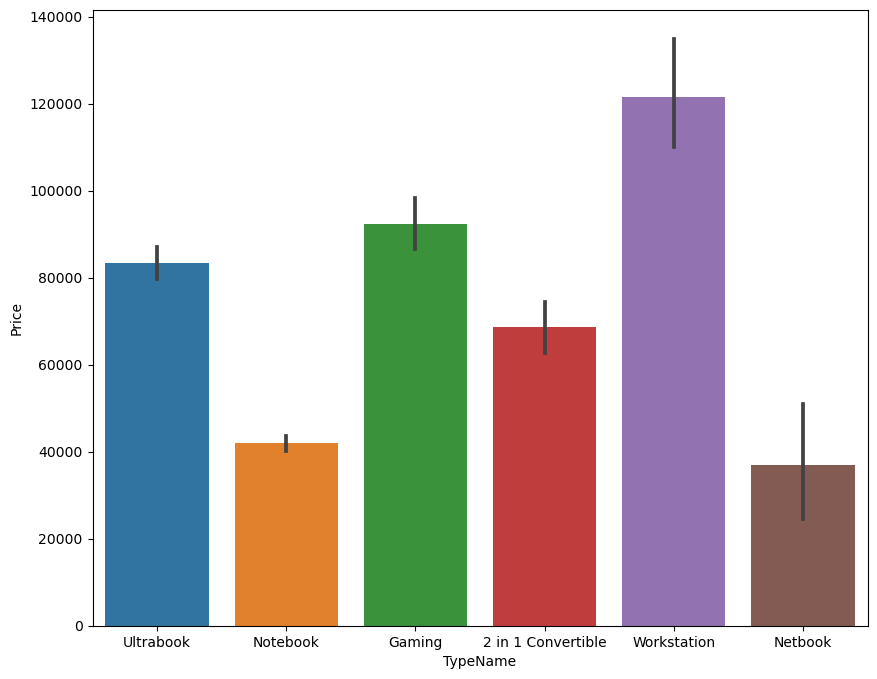

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['TypeName'],y=df['Price'])

/*** Above graph clearly show that there is influence of TypeName on deciding laptop price if we see Notebook type laptop which has high market share are low priced(may be because give desirable feature at competative price) compare to other brands ***/ Hence we go no retain this on model selection***/

In [45]:
pd.crosstab(df['Inches'],columns='count')

col_0   count
Inches       
10.1        3
11.3        1
11.6       29
12.0        6
12.3        5
12.5       38
13.0        2
13.3      157
13.5        5
13.9        6
14.0      188
14.1        1
15.0        4
15.4        4
15.6      621
17.0        1
17.3      162
18.4        1
24.0        2
25.6        1
27.3        1
31.6        1
33.5        1
35.6        3

Screen size 15.6 inches are most popular size in market

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

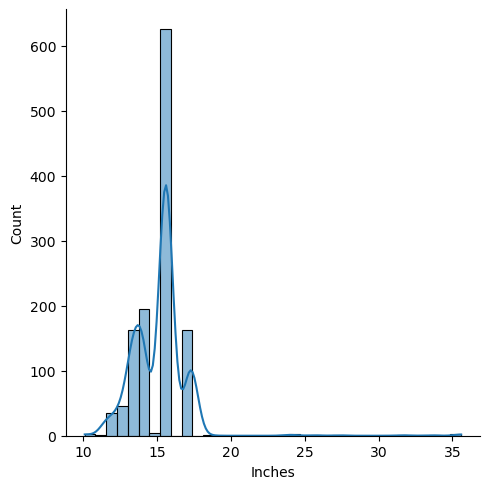

In [46]:
plt.figure(figsize=(10,8))
sns.displot(df['Inches'],bins=35,kde=True)

<Axes: xlabel='Inches', ylabel='Price'>

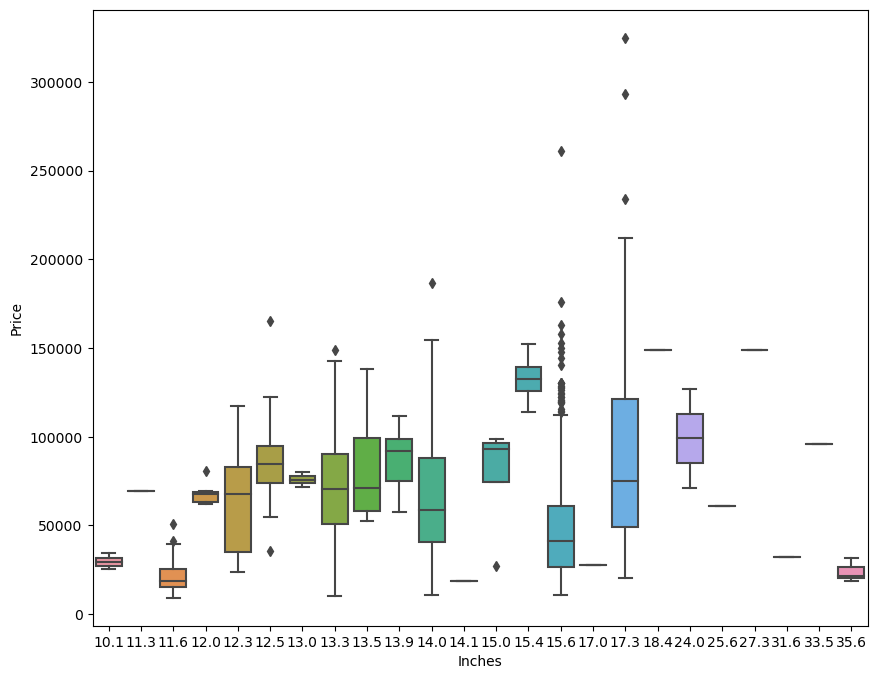

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Inches'],y=df['Price'])

<Axes: xlabel='Inches', ylabel='Price'>

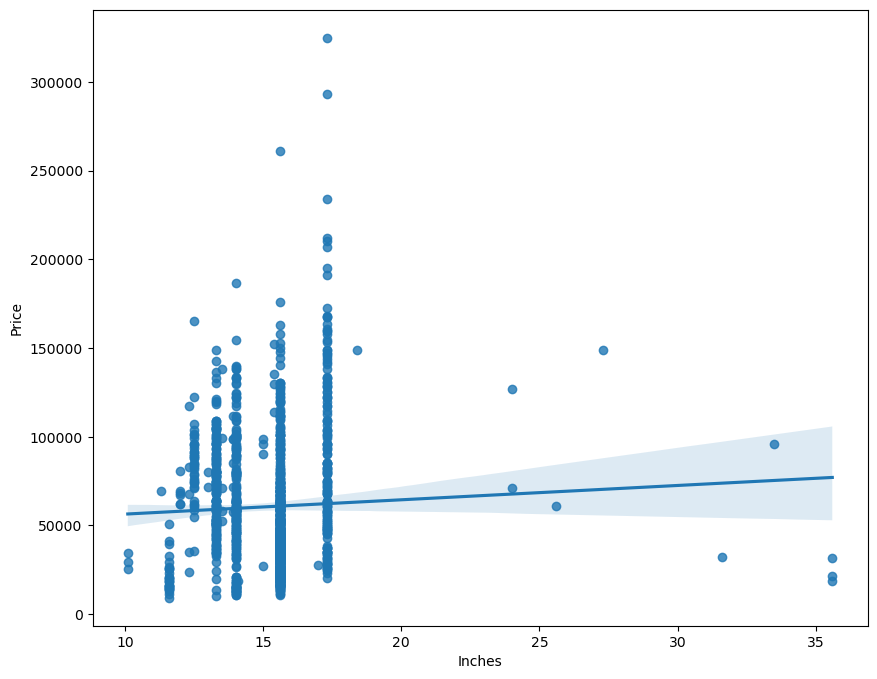

In [48]:
plt.figure(figsize=(10,8))
sns.regplot(x=df['Inches'],y=df['Price'],scatter=True)

<Axes: xlabel='Inches', ylabel='Price'>

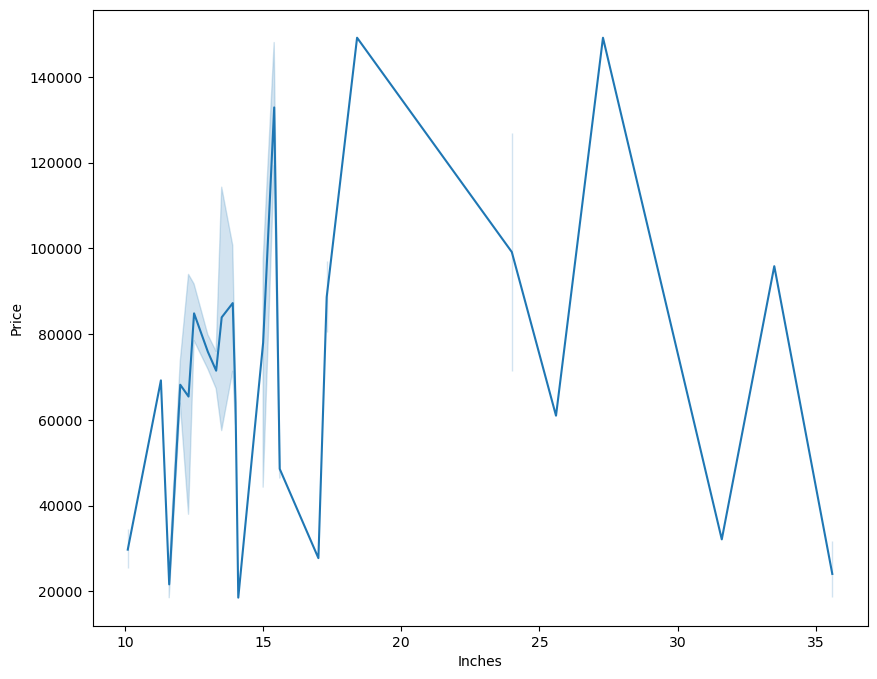

In [49]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df['Inches'],y=df['Price'])

/Above graph clearly show that there is postive as well as negative influence of Inches on deciding laptop price if we see most the laptop sold are between 15 to 25 inches range compare to other brands /*** Hence we go no retain this on model selection***

In [50]:
pd.crosstab(df['ScreenResolution'].sort_index(ascending=False),columns='count')

col_0                                          count
ScreenResolution                                    
1366x768                                         255
1440x900                                           4
1600x900                                          23
1920x1080                                          3
2560x1440                                          3
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
Full HD / Touchscreen 1920x1080                   45
Full HD 1920x1080                                493
IPS Panel 1366x768                                 7
IPS Panel 2560x1440                                4
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel Full HD / Touchscreen 1920x1080         50
IPS Panel Full HD 1366x768                         1
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD 1920x1200                        1
IPS Panel Full HD 2160x1440                        2
IPS Panel Full HD 2560x1440                        1
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
IPS Panel Quad HD+ 2560x1440                       3
IPS Panel Quad HD+ 3200x1800                       2
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2736x1824                 1
IPS Panel Retina Display 2880x1800                 4
IPS Panel Touchscreen / 4K Ultra HD 3840x2160      2
IPS Panel Touchscreen 1366x768                     3
IPS Panel Touchscreen 1920x1200                    3
IPS Panel Touchscreen 2400x1600                    1
IPS Panel Touchscreen 2560x1440                    5
Quad HD+ / Touchscreen 3200x1800                  14
Quad HD+ 3200x1800                                 3
Touchscreen / 4K Ultra HD 3840x2160                1
Touchscreen / Full HD 1920x1080                    1
Touchscreen / Quad HD+ 3200x1800                   1
Touchscreen 1366x768                              16
Touchscreen 2256x1504                              6
Touchscreen 2400x1600                              3
Touchscreen 2560x1440                              6

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1243 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   float64
 6   Memory            1243 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight_kg         1243 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(4), object(7)
memory usage: 116.7+ KB


# Feature enginerring

In [57]:
df.sample(5)

Company  TypeName  Inches             ScreenResolution  \
1057    Acer  Notebook    15.6                     1366x768   
84      Acer  Notebook    15.6                     1366x768   
709       HP  Notebook    17.3  IPS Panel Full HD 1920x1080   
165      MSI    Gaming    15.6  IPS Panel Full HD 1920x1080   
901     Asus    Gaming    17.3  IPS Panel Full HD 1920x1080   

                              Cpu   Ram                  Memory  \
1057    AMD A8-Series 7410 2.2GHz   8.0                 1TB HDD   
84        AMD A9-Series 9420 3GHz   4.0                 1TB HDD   
709   AMD A10-Series 9620P 2.5GHz   6.0                 2TB HDD   
165   Intel Core i7 7700HQ 2.8GHz  16.0    256GB SSD +  1TB HDD   
901   Intel Core i7 6820HK 2.7GHz  32.0  256GB SSD +  256GB SSD   

                          Gpu       OpSys  Weight_kg       Price  
1057            AMD Radeon R5  Windows 10       2.40  23922.7200  
84              AMD Radeon R5  Windows 10       2.10  21045.6000  
709            AMD Radeon 530  Windows 10       2.71  34898.9328  
165   Nvidia GeForce GTX 1060  Windows 10       2.40  95850.7200  
901   Nvidia GeForce GTX 980M  Windows 10       3.58  68145.1200

In [59]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if isinstance(x, str) and 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen', ylabel='Price'>

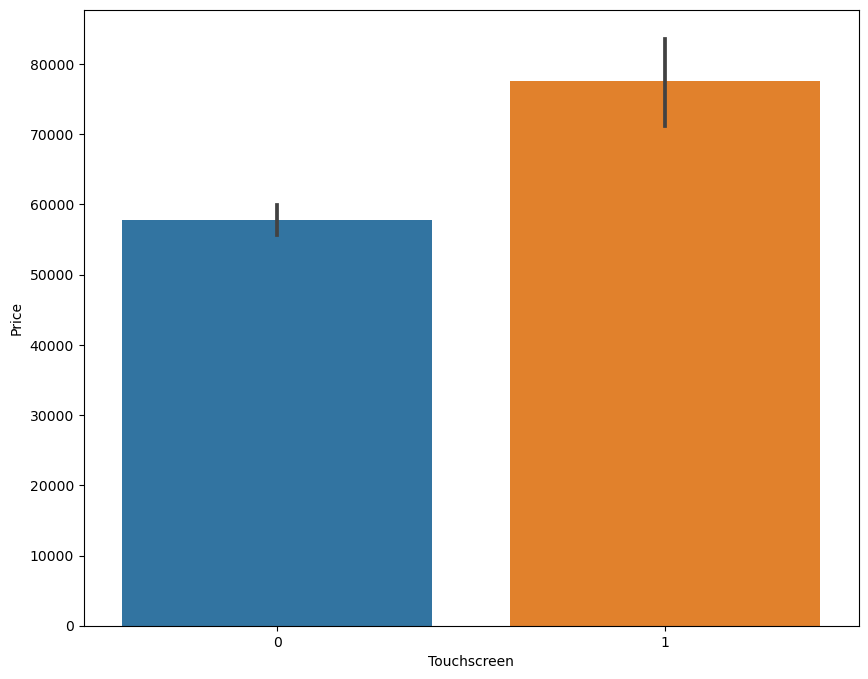

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Touchscreen'],y=df['Price'])

we see the screen display has some infulence on price of laptop so we consider this in, **Model_selection**

In [61]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if isinstance(x, str) and 'IPS' in x else 0)

In [62]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8.0            128GB SSD   
1        Intel Core i5 1.8GHz   8.0  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8.0            256GB SSD   
3        Intel Core i7 2.7GHz  16.0            512GB SSD   
4        Intel Core i5 3.1GHz   8.0            256GB SSD   

                            Gpu  OpSys  Weight_kg        Price  Touchscreen  \
0  Intel Iris Plus Graphics 640  macOS       1.37   71378.6832            0   
1        Intel HD Graphics 6000  macOS       1.34   47895.5232            0   
2         Intel HD Graphics 620  No OS       1.86   30636.0000            0   
3            AMD Radeon Pro 455  macOS       1.83  135195.3360            0   
4  Intel Iris Plus Graphics 650  macOS       1.37   96095.8080            0   

   IPS  
0    1  
1    0  
2    0  
3    1  
4    1

<Axes: xlabel='IPS'>

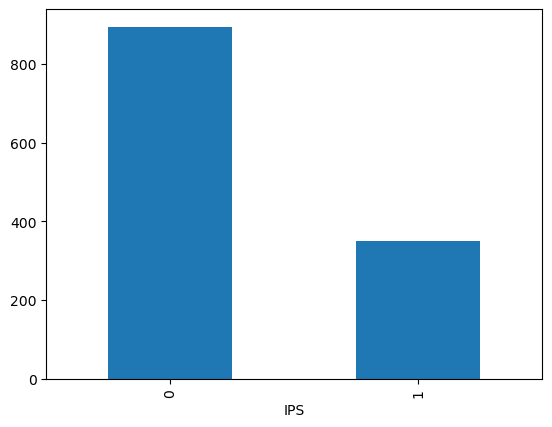

In [64]:
df['IPS'].value_counts().plot(kind='bar')

In [66]:
df.drop(columns='ScreenResolution',inplace=True)

In [67]:
df.head() # drop screen resolution columns

Company   TypeName  Inches                         Cpu   Ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz   8.0   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz   8.0   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz   8.0   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz  16.0   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz   8.0   

                Memory                           Gpu  OpSys  Weight_kg  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS       1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS       1.34   
2            256GB SSD         Intel HD Graphics 620  No OS       1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS       1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS       1.37   

         Price  Touchscreen  IPS  
0   71378.6832            0    1  
1   47895.5232            0    0  
2   30636.0000            0    0  
3  135195.3360            0    1  
4   96095.8080            0    1

In [68]:
pd.crosstab(df['Cpu'],columns='counts')

col_0                                 counts
Cpu                                         
AMD A10-Series 9600P 2.4GHz                2
AMD A10-Series 9620P 2.5GHz                2
AMD A10-Series A10-9620P 2.5GHz            2
AMD A12-Series 9700P 2.5GHz                1
AMD A12-Series 9720P 2.7GHz                2
...                                      ...
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Xeon E3-1505M V6 3GHz                2
Intel Xeon E3-1535M v5 2.9GHz              1
Intel Xeon E3-1535M v6 3.1GHz              1
Samsung Cortex A72&A53 2.0GHz              1

[118 rows x 1 columns]

In [70]:
# feature enginering
df['Cpu'] = df['Cpu'].apply(lambda x: str(x))
df['Cpu'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [71]:
df['Cpu'].value_counts()

Cpu
Intel Core i7               503
Intel Core i5               410
Intel Core i3               132
Intel Celeron Dual           68
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           4
AMD A8-Series 7410            4
AMD Ryzen 1700                3
Intel Atom x5-Z8550           3
Intel Pentium Dual            3
AMD E-Series E2-9000e         2
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
Intel Atom x5-Z8300           1
AMD A12-Series 9700P          1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD E-Series 6110             1
AMD FX 8800P                  1
AMD 

In [73]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD processor'

df['Processor'] = df['Cpu'].apply(fetch_processor)


In [74]:
df.head()

Company   TypeName  Inches            Cpu   Ram               Memory  \
0   Apple  Ultrabook    13.3  Intel Core i5   8.0            128GB SSD   
1   Apple  Ultrabook    13.3  Intel Core i5   8.0  128GB Flash Storage   
2      HP   Notebook    15.6  Intel Core i5   8.0            256GB SSD   
3   Apple  Ultrabook    15.4  Intel Core i7  16.0            512GB SSD   
4   Apple  Ultrabook    13.3  Intel Core i5   8.0            256GB SSD   

                            Gpu  OpSys  Weight_kg        Price  Touchscreen  \
0  Intel Iris Plus Graphics 640  macOS       1.37   71378.6832            0   
1        Intel HD Graphics 6000  macOS       1.34   47895.5232            0   
2         Intel HD Graphics 620  No OS       1.86   30636.0000            0   
3            AMD Radeon Pro 455  macOS       1.83  135195.3360            0   
4  Intel Iris Plus Graphics 650  macOS       1.37   96095.8080            0   

   IPS      Processor  
0    1  Intel Core i5  
1    0  Intel Core i5  
2    0  Intel Core i5  
3    1  Intel Core i7  
4    1  Intel Core i5

In [75]:
df.drop(columns=['Cpu'],inplace=True)

In [76]:
df

Company            TypeName  Inches   Ram               Memory  \
0      Apple           Ultrabook    13.3   8.0            128GB SSD   
1      Apple           Ultrabook    13.3   8.0  128GB Flash Storage   
2         HP            Notebook    15.6   8.0            256GB SSD   
3      Apple           Ultrabook    15.4  16.0            512GB SSD   
4      Apple           Ultrabook    13.3   8.0            256GB SSD   
...      ...                 ...     ...   ...                  ...   
1269    Asus            Notebook    15.6   4.0            500GB HDD   
1270  Lenovo  2 in 1 Convertible    14.0   4.0            128GB SSD   
1271  Lenovo  2 in 1 Convertible    13.3  16.0            512GB SSD   
1272  Lenovo            Notebook    14.0   2.0   64GB Flash Storage   
1273      HP            Notebook    15.6   6.0              1TB HDD   

                               Gpu       OpSys  Weight_kg        Price  \
0     Intel Iris Plus Graphics 640       macOS       1.37   71378.6832   
1           Intel HD Graphics 6000       macOS       1.34   47895.5232   
2            Intel HD Graphics 620       No OS       1.86   30636.0000   
3               AMD Radeon Pro 455       macOS       1.83  135195.3360   
4     Intel Iris Plus Graphics 650       macOS       1.37   96095.8080   
...                            ...         ...        ...          ...   
1269           Nvidia GeForce 920M  Windows 10       2.20   38378.6496   
1270         Intel HD Graphics 520  Windows 10       1.80   33992.6400   
1271         Intel HD Graphics 520  Windows 10       1.30   79866.7200   
1272             Intel HD Graphics  Windows 10       1.50   12201.1200   
1273            AMD Radeon R5 M330  Windows 10       2.19   40705.9200   

      Touchscreen  IPS              Processor  
0               0    1          Intel Core i5  
1               0    0          Intel Core i5  
2               0    0          Intel Core i5  
3               0    1          Intel Core i7  
4               0    1          Intel Core i5  
...           ...  ...                    ...  
1269            0    0          Intel Core i7  
1270            1    1          Intel Core i7  
1271            1    1          Intel Core i7  
1272            0    0  Other Intel Processor  
1273            0    0          Intel Core i7  

[1245 rows x 12 columns]

Text(0.5, 1.0, 'Frequency of types of cpu  of laptop sold')

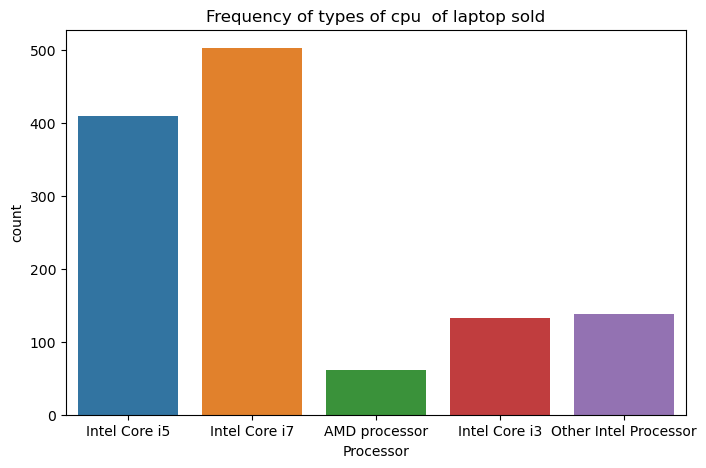

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Processor'])
plt.title('Frequency of types of cpu  of laptop sold')

<Axes: xlabel='Processor', ylabel='Price'>

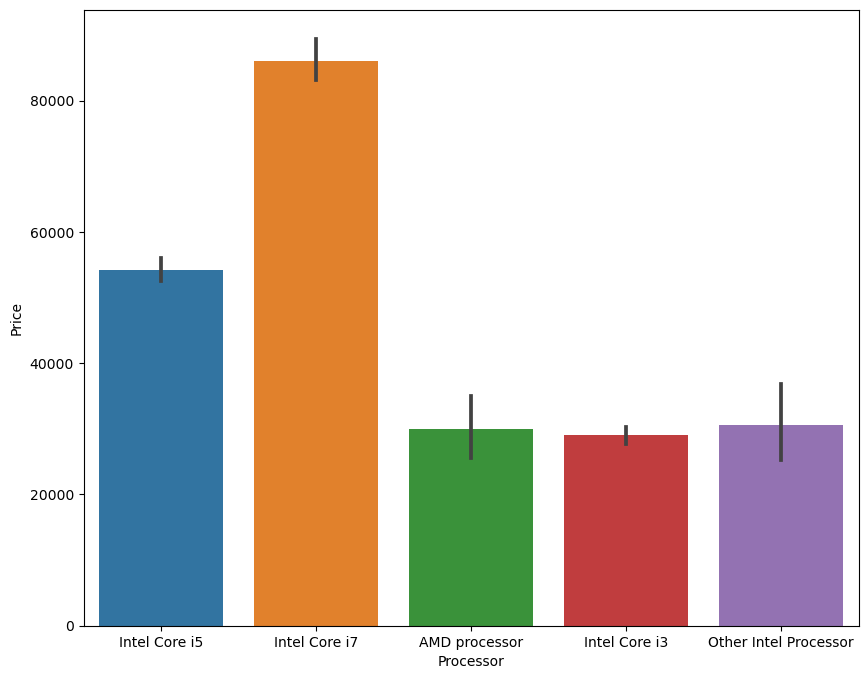

In [78]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Processor'],y=df['Price'])

Price has siginificantly infulence by types of cpu Hence we consider **Processor in model_selection**

In [79]:
df['Ram'].value_counts()

Ram
8.0     595
4.0     358
16.0    192
6.0      34
12.0     25
32.0     17
2.0      16
64.0      3
24.0      3
1.0       1
Name: count, dtype: int64

In [80]:
pd.crosstab(df['Ram'],columns='counts')

col_0  counts
Ram          
1.0         1
2.0        16
4.0       358
6.0        34
8.0       595
12.0       25
16.0      192
24.0        3
32.0       17
64.0        3

In [81]:
df['Ram'].corr(df['Price']) # higly co related

0.6819223861643546

Text(0.5, 1.0, 'Count of specefic ram capacity')

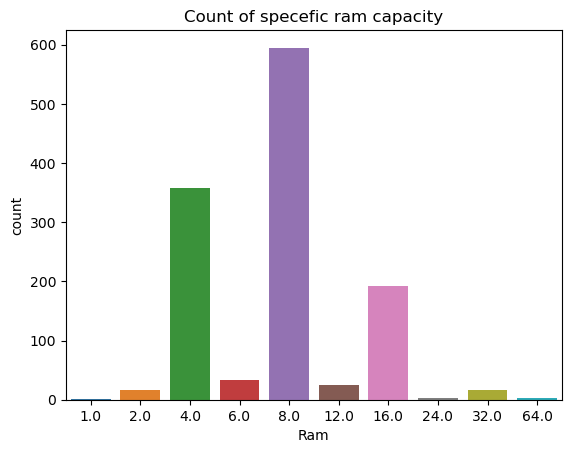

In [82]:
sns.countplot(x=df['Ram'])
plt.title('Count of specefic ram capacity')

In [84]:
df =df[df['Ram'] != 1.0] # ommiting ram of 1 gb it was only 1 in number but cause casuality it obstruction in linear model

<Axes: xlabel='Ram', ylabel='Price'>

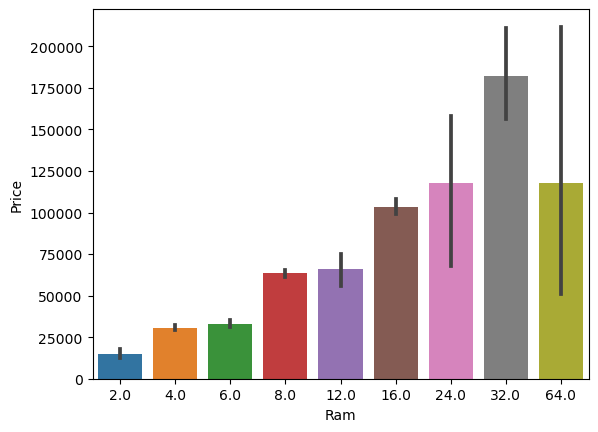

In [85]:
sns.barplot(x=df['Ram'],y=df['Price'])

Price has siginificantly infulence by types of Ram Storage,we see that 8Gb laptop has large market share and also price moderately between 4GB and 16GB, Hence we consider **Ram in model_selection**

In [86]:
df['Memory'].value_counts()

Memory
256GB SSD                        400
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [87]:
pd.crosstab(df['Memory'],columns='counts')

col_0                          counts
Memory                               
1.0TB HDD                           1
1.0TB Hybrid                        7
128GB Flash Storage                 4
128GB HDD                           1
128GB SSD                          72
128GB SSD +  1TB HDD               92
128GB SSD +  2TB HDD                2
16GB Flash Storage                  7
16GB SSD                            3
180GB SSD                           4
1TB HDD                           209
1TB HDD +  1TB HDD                  1
1TB SSD                            13
1TB SSD +  1TB HDD                  2
240GB SSD                           1
256GB Flash Storage                 8
256GB SSD                         400
256GB SSD +  1.0TB Hybrid           1
256GB SSD +  1TB HDD               71
256GB SSD +  256GB SSD              2
256GB SSD +  2TB HDD               10
256GB SSD +  500GB HDD              2
2TB HDD                            16
32GB Flash Storage                 35
32GB HDD                            1
32GB SSD                            6
500GB HDD                         121
508GB Hybrid                        1
512GB Flash Storage                 2
512GB SSD                         112
512GB SSD +  1.0TB Hybrid           1
512GB SSD +  1TB HDD               14
512GB SSD +  256GB SSD              1
512GB SSD +  2TB HDD                3
512GB SSD +  512GB SSD              1
64GB Flash Storage                 12
64GB Flash Storage +  1TB HDD       1
64GB SSD                            1
8GB SSD                             1

In [89]:
# Function to check presence of keywords and update the corresponding column
def update_storage_columns(row):
    memory = row['Memory']
    if isinstance(memory, str):
        if 'HDD' in memory:
            row['HDD'] = 1
        elif 'SSD' in memory:
            row['SSD'] = 1
        elif 'Flash Storage' in memory:
            row['Flash Storage'] = 1
        elif 'Hybrid' in memory:
            row['Hybrid'] = 1
    return row

# Apply the function to each row
df = df.apply(update_storage_columns, axis=1)

In [90]:
df.drop(columns='Memory',inplace=True)

In [91]:
df.head()

Company   TypeName  Inches   Ram                           Gpu  OpSys  \
0   Apple  Ultrabook    13.3   8.0  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook    13.3   8.0        Intel HD Graphics 6000  macOS   
2      HP   Notebook    15.6   8.0         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook    15.4  16.0            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook    13.3   8.0  Intel Iris Plus Graphics 650  macOS   

   Weight_kg        Price  Touchscreen  IPS      Processor  HDD  SSD  \
0       1.37   71378.6832            0    1  Intel Core i5    0    1   
1       1.34   47895.5232            0    0  Intel Core i5    0    0   
2       1.86   30636.0000            0    0  Intel Core i5    0    1   
3       1.83  135195.3360            0    1  Intel Core i7    0    1   
4       1.37   96095.8080            0    1  Intel Core i5    0    1   

   Flash Storage  Hybrid  
0              0       0  
1              1       0  
2              0       0  
3              0       0  
4              0       0

Price has siginificantly infulence by types of  Storage,we see that 256Gb ssd laptop has large market share and also moderately price , **Hence we consider Memory in model_selection**

In [92]:
pd.crosstab(df['Gpu'],columns='counts')

col_0                 counts
Gpu                         
AMD FirePro W4190M         1
AMD FirePro W4190M         2
AMD FirePro W5130M         1
AMD FirePro W6150M         1
AMD R17M-M1-70             1
...                      ...
Nvidia Quadro M3000M       1
Nvidia Quadro M500M        1
Nvidia Quadro M520M        2
Nvidia Quadro M620         5
Nvidia Quadro M620M        1

[110 rows x 1 columns]

In [94]:
df['Gpu'] = df['Gpu'].apply(lambda x: str(x))
df['Gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [95]:
df.head()

Company   TypeName  Inches   Ram                           Gpu  OpSys  \
0   Apple  Ultrabook    13.3   8.0  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook    13.3   8.0        Intel HD Graphics 6000  macOS   
2      HP   Notebook    15.6   8.0         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook    15.4  16.0            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook    13.3   8.0  Intel Iris Plus Graphics 650  macOS   

   Weight_kg        Price  Touchscreen  IPS      Processor  HDD  SSD  \
0       1.37   71378.6832            0    1  Intel Core i5    0    1   
1       1.34   47895.5232            0    0  Intel Core i5    0    0   
2       1.86   30636.0000            0    0  Intel Core i5    0    1   
3       1.83  135195.3360            0    1  Intel Core i7    0    1   
4       1.37   96095.8080            0    1  Intel Core i5    0    1   

   Flash Storage  Hybrid Gpu_brand  
0              0       0     Intel  
1              1       0     Intel  
2              0       0     Intel  
3              0       0       AMD  
4              0       0     Intel

In [96]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     683
Nvidia    389
AMD       170
nan         1
ARM         1
Name: count, dtype: int64

In [97]:
df =df[df['Gpu_brand'] != 'ARM']

In [98]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     683
Nvidia    389
AMD       170
nan         1
Name: count, dtype: int64

<Axes: xlabel='Gpu_brand', ylabel='count'>

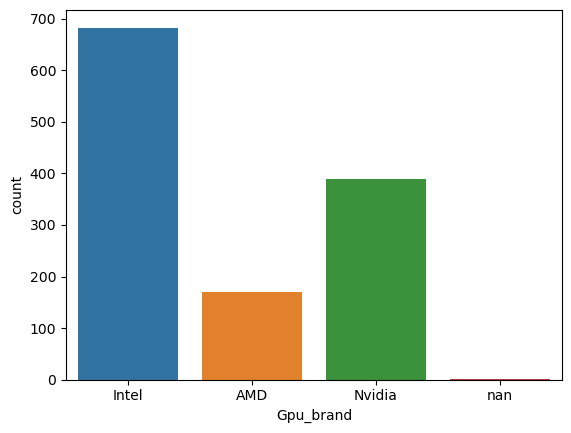

In [100]:

sns.countplot(x=df['Gpu_brand'])

<Axes: xlabel='Gpu_brand', ylabel='Price'>

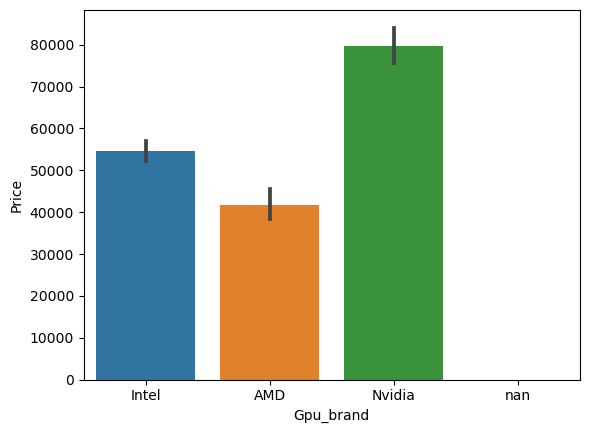

In [101]:

sns.barplot(x=df['Gpu_brand'],y=df['Price'])

Price has siginificantly infulence by types of graphic card used in laptop,  **Hence we consider Gpu_brand in model_selection**

In [102]:
df['OpSys'].value_counts()

OpSys
Windows 10      1021
No OS             63
Linux             57
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [103]:
pd.crosstab(df['OpSys'],columns='counts')

col_0         counts
OpSys               
Android            1
Chrome OS         26
Linux             57
Mac OS X           8
No OS             63
Windows 10      1021
Windows 10 S       8
Windows 7         45
macOS             13

In [104]:
def op_os(inp):
    if inp =='Windows 10 S' or inp =='Windows 10' or inp =='Windows 7':
        return 'Windows'
    elif inp=='Mac OS X' or inp=='macOS':
        return 'Mac'
    else:
        return 'Other'
df['Os'] = df['OpSys'].apply(op_os)

In [105]:
df.head()

Company   TypeName  Inches   Ram                           Gpu  OpSys  \
0   Apple  Ultrabook    13.3   8.0  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook    13.3   8.0        Intel HD Graphics 6000  macOS   
2      HP   Notebook    15.6   8.0         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook    15.4  16.0            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook    13.3   8.0  Intel Iris Plus Graphics 650  macOS   

   Weight_kg        Price  Touchscreen  IPS      Processor  HDD  SSD  \
0       1.37   71378.6832            0    1  Intel Core i5    0    1   
1       1.34   47895.5232            0    0  Intel Core i5    0    0   
2       1.86   30636.0000            0    0  Intel Core i5    0    1   
3       1.83  135195.3360            0    1  Intel Core i7    0    1   
4       1.37   96095.8080            0    1  Intel Core i5    0    1   

   Flash Storage  Hybrid Gpu_brand     Os  
0              0       0     Intel    Mac  
1              1       0     Intel    Mac  
2              0       0     Intel  Other  
3              0       0       AMD    Mac  
4              0       0     Intel    Mac

In [107]:
df.drop(columns=['Gpu','OpSys'],inplace=True)

<Axes: xlabel='Os', ylabel='count'>

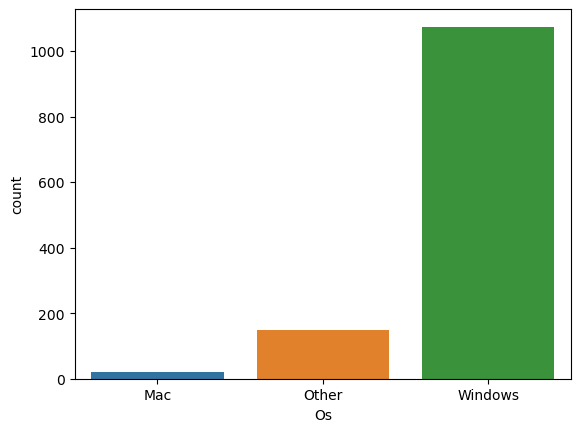

In [108]:
sns.countplot(x=df['Os'])

<Axes: xlabel='Os', ylabel='Price'>

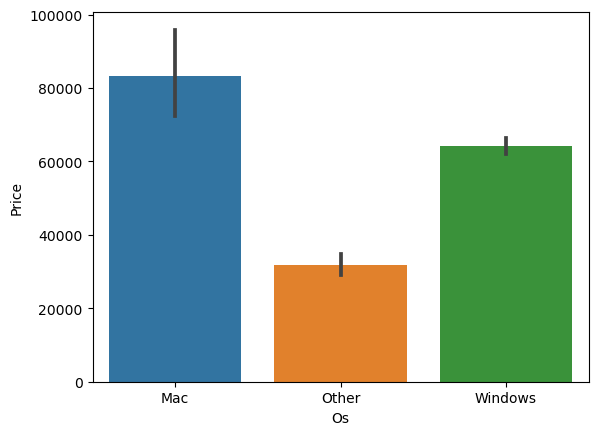

In [109]:
sns.barplot(x=df['Os'],y=df['Price'])

Price has siginificantly infulence by types of Operating system  used in laptop, **Hence we consider OPSsys in model_selection**

In [110]:
df['Weight_kg'].value_counts()

Weight_kg
2.20    109
2.10     57
2.00     42
2.40     41
2.30     37
       ... 
3.42      1
2.54      1
4.33      1
1.41      1
2.34      1
Name: count, Length: 180, dtype: int64

In [111]:
pd.crosstab(df['Weight_kg'],columns='counts')

col_0      counts
Weight_kg        
0.0002          1
0.6900          3
0.8100          2
0.9100          1
0.9200          6
...           ...
6.2000          1
7.2000          2
8.2300          1
8.4000          1
11.1000         1

[180 rows x 1 columns]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


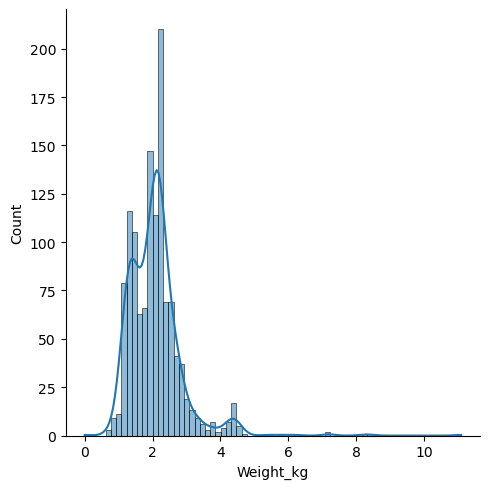

In [112]:

sns.displot(x=df['Weight_kg'],kde=True)

<Axes: xlabel='Weight_kg', ylabel='Price'>

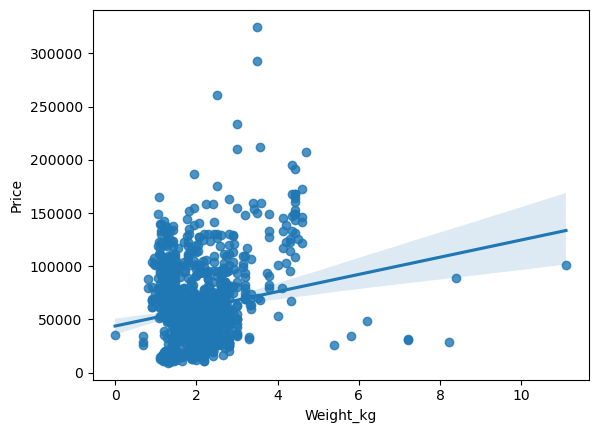

In [113]:

sns.regplot(x=df['Weight_kg'],y=df['Price'],scatter=True)

**price is dependent of weight variable as we see in scatter plot most of laptop weight between 1.25 kg and 2.5 kg are priced low as well as priced high so we gono take "weight_kg" column during model selection***

In [115]:
df.drop(columns='Inches',inplace=True)

In [116]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr(method='pearson')
correlation_matrix

Ram  Weight_kg     Price  Touchscreen       IPS       HDD  \
Ram            1.000000   0.285325  0.682081     0.093499  0.213755 -0.019229   
Weight_kg      0.285325   1.000000  0.175794    -0.248269  0.008685  0.410042   
Price          0.682081   0.175794  1.000000     0.189042  0.254658 -0.167285   
Touchscreen    0.093499  -0.248269  0.189042     1.000000  0.136358 -0.238983   
IPS            0.213755   0.008685  0.254658     0.136358  1.000000 -0.131936   
HDD           -0.019229   0.410042 -0.167285    -0.238983 -0.131936  1.000000   
SSD            0.095483  -0.313941  0.264121     0.237667  0.140365 -0.882962   
Flash Storage -0.169814  -0.215952 -0.206543     0.013714  0.001492 -0.211603   
Hybrid        -0.011361   0.024731 -0.030034    -0.033012 -0.050287 -0.071351   

                    SSD  Flash Storage    Hybrid  
Ram            0.095483      -0.169814 -0.011361  
Weight_kg     -0.313941      -0.215952  0.024731  
Price          0.264121      -0.206543 -0.030034  
Touchscreen    0.237667       0.013714 -0.033012  
IPS            0.140365       0.001492 -0.050287  
HDD           -0.882962      -0.211603 -0.071351  
SSD            1.000000      -0.237732 -0.080161  
Flash Storage -0.237732       1.000000 -0.019211  
Hybrid        -0.080161      -0.019211  1.000000

<Axes: >

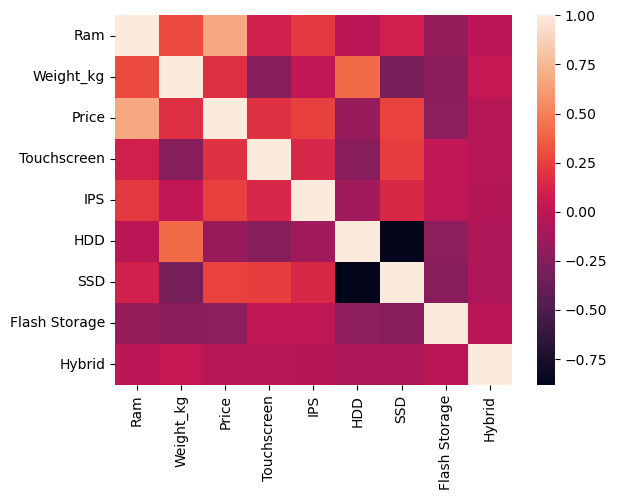

In [117]:
sns.heatmap(correlation_matrix)

(array([437., 434., 225.,  95.,  36.,   8.,   3.,   2.,   1.,   1.]),
 array([  9270.72,  40839.12,  72407.52, 103975.92, 135544.32, 167112.72,
        198681.12, 230249.52, 261817.92, 293386.32, 324954.72]),
 <BarContainer object of 10 artists>)

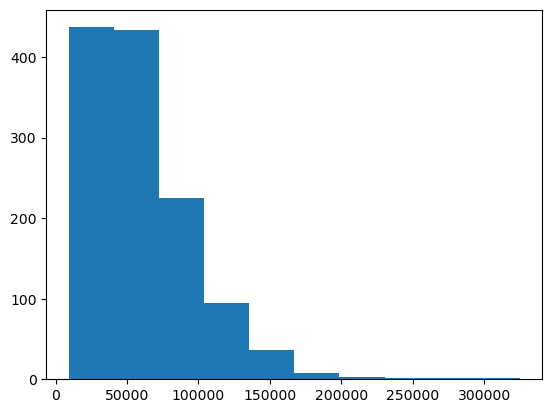

In [118]:
plt.hist(df['Price'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1273
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1242 non-null   object 
 1   TypeName       1242 non-null   object 
 2   Ram            1242 non-null   float64
 3   Weight_kg      1241 non-null   float64
 4   Price          1242 non-null   float64
 5   Touchscreen    1243 non-null   int64  
 6   IPS            1243 non-null   int64  
 7   Processor      1243 non-null   object 
 8   HDD            1243 non-null   int64  
 9   SSD            1243 non-null   int64  
 10  Flash Storage  1243 non-null   int64  
 11  Hybrid         1243 non-null   int64  
 12  Gpu_brand      1243 non-null   object 
 13  Os             1243 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 145.7+ KB


# Feature Engineering

In [ ]:
df.insert(10,"Price_class","") # inserting new col

In [128]:
df.describe()['Price']

count      1242.000000
mean      60632.693194
std       37447.193104
min        9270.720000
25%       32645.055600
50%       52693.920000
75%       79813.440000
max      324954.720000
Name: Price, dtype: float64

In [129]:
for i in df.index:
    if df['Price'][i] <= 32660:
        df.at[i, 'Price_class'] = 'Low'
    elif df['Price'][i] >= 79813.44:
        df.at[i, 'Price_class'] = 'High'
    else:df.at[i,'Price_class'] = 'Medium'

In [123]:
df

Company            TypeName   Ram  Weight_kg        Price  Touchscreen  \
0      Apple           Ultrabook   8.0       1.37   71378.6832            0   
1      Apple           Ultrabook   8.0       1.34   47895.5232            0   
2         HP            Notebook   8.0       1.86   30636.0000            0   
3      Apple           Ultrabook  16.0       1.83  135195.3360            0   
4      Apple           Ultrabook   8.0       1.37   96095.8080            0   
...      ...                 ...   ...        ...          ...          ...   
1269    Asus            Notebook   4.0       2.20   38378.6496            0   
1270  Lenovo  2 in 1 Convertible   4.0       1.80   33992.6400            1   
1271  Lenovo  2 in 1 Convertible  16.0       1.30   79866.7200            1   
1272  Lenovo            Notebook   2.0       1.50   12201.1200            0   
1273      HP            Notebook   6.0       2.19   40705.9200            0   

      IPS              Processor  HDD  SSD Price_class  Flash Storage  Hybrid  \
0       1          Intel Core i5    0    1      Medium              0       0   
1       0          Intel Core i5    0    0      Medium              1       0   
2       0          Intel Core i5    0    1         Low              0       0   
3       1          Intel Core i7    0    1        High              0       0   
4       1          Intel Core i5    0    1        High              0       0   
...   ...                    ...  ...  ...         ...            ...     ...   
1269    0          Intel Core i7    1    0      Medium              0       0   
1270    1          Intel Core i7    0    1      Medium              0       0   
1271    1          Intel Core i7    0    1        High              0       0   
1272    0  Other Intel Processor    0    0         Low              1       0   
1273    0          Intel Core i7    1    0      Medium              0       0   

     Gpu_brand       Os  
0        Intel      Mac  
1        Intel      Mac  
2        Intel    Other  
3          AMD      Mac  
4        Intel      Mac  
...        ...      ...  
1269    Nvidia  Windows  
1270     Intel  Windows  
1271     Intel  Windows  
1272     Intel  Windows  
1273       AMD  Windows  

[1243 rows x 15 columns]

In [124]:
df['Price_class'].value_counts()

Price_class
Medium    620
High      312
Low       311
Name: count, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1242 non-null   object 
 1   TypeName       1242 non-null   object 
 2   Ram            1242 non-null   float64
 3   Weight_kg      1241 non-null   float64
 4   Price          1242 non-null   float64
 5   Touchscreen    1243 non-null   int64  
 6   IPS            1243 non-null   int64  
 7   Processor      1243 non-null   object 
 8   HDD            1243 non-null   int64  
 9   SSD            1243 non-null   int64  
 10  Price_class    1243 non-null   object 
 11  Flash Storage  1243 non-null   int64  
 12  Hybrid         1243 non-null   int64  
 13  Gpu_brand      1243 non-null   object 
 14  Os             1243 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 187.7+ KB


In [125]:
df.isnull().sum()

Company          1
TypeName         1
Ram              1
Weight_kg        2
Price            1
Touchscreen      0
IPS              0
Processor        0
HDD              0
SSD              0
Price_class      0
Flash Storage    0
Hybrid           0
Gpu_brand        0
Os               0
dtype: int64

# Filling missing value

In [130]:
df = df.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
df.isnull().sum()

Company          0
TypeName         0
Ram              0
Weight_kg        0
Price            0
Touchscreen      0
IPS              0
Processor        0
HDD              0
SSD              0
Price_class      0
Flash Storage    0
Hybrid           0
Gpu_brand        0
Os               0
dtype: int64

 # Outlier Treatment

<Axes: >

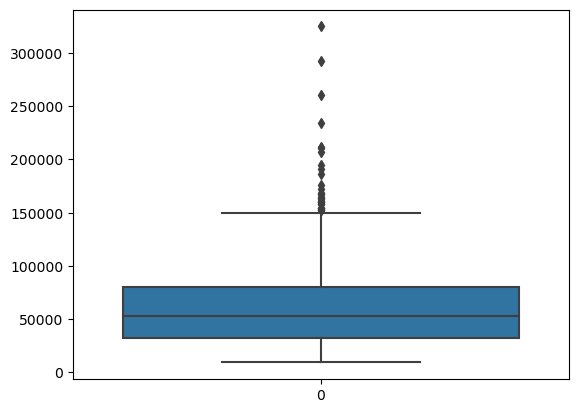

In [131]:
sns.boxplot(df['Price'])

In [132]:
df.describe()['Price']

count      1243.000000
mean      60626.306410
std       37432.791972
min        9270.720000
25%       32650.250400
50%       52693.920000
75%       79813.440000
max      324954.720000
Name: Price, dtype: float64

In [133]:
Q3 =   int(df.describe()['Price']['75%'])
Q3

79813

In [135]:
Q1 =   int(df.describe()['Price']['25%'])
Q1

32650

In [136]:
IQR = Q3 -Q1
IQR

47163

In [137]:
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR

In [138]:
Lower_limit

-38094.5

In [139]:
Upper_limit

150557.5

In [140]:
df['Price'].max()

324954.72

In [141]:
df['Price'].min()

9270.72

In [142]:
df['Price'] = df['Price'].clip(Lower_limit,Upper_limit)

In [144]:
import plotly.express as px

In [145]:
px.box(df['Price'])

In [150]:
df.describe()['Ram']

count    1243.000000
mean        8.537409
std         5.583577
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

In [146]:
df.isnull().sum()

Company          0
TypeName         0
Ram              0
Weight_kg        0
Price            0
Touchscreen      0
IPS              0
Processor        0
HDD              0
SSD              0
Price_class      0
Flash Storage    0
Hybrid           0
Gpu_brand        0
Os               0
dtype: int64

In [147]:
df.head(2)

Company   TypeName  Ram  Weight_kg       Price  Touchscreen  IPS  \
0   Apple  Ultrabook  8.0       1.37  71378.6832            0    1   
1   Apple  Ultrabook  8.0       1.34  47895.5232            0    0   

       Processor  HDD  SSD Price_class  Flash Storage  Hybrid Gpu_brand   Os  
0  Intel Core i5    0    1      Medium              0       0     Intel  Mac  
1  Intel Core i5    0    0      Medium              1       0     Intel  Mac

In [149]:
px.box(df['Ram']) # outlier

In [151]:
Q3 =   int(df.describe()['Ram']['75%'])
Q3

8

In [153]:
Q1 =   int(df.describe()['Ram']['25%'])
Q1

4

In [154]:
IQR = Q3 -Q1
IQR

4

In [155]:
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR

In [156]:
Lower_limit

-2.0

In [157]:
Upper_limit

14.0

In [158]:
df['Ram'].max()

64.0

In [160]:
df['Ram'].min()

2.0

In [161]:
df['Ram'] = df['Ram'].clip(Lower_limit,Upper_limit)

In [162]:
px.box(df['Ram'])

In [163]:
px.box(df['Weight_kg'])

In [164]:
df.describe()['Weight_kg']

count    1243.000000
mean        2.081303
std         0.813528
min         0.000200
25%         1.500000
50%         2.040000
75%         2.330000
max        11.100000
Name: Weight_kg, dtype: float64

In [166]:
Q3= df.describe()['Weight_kg']['75%']

In [167]:
Q1= df.describe()['Weight_kg']['25%']

In [169]:
IQR = Q3-Q1
IQR

0.8300000000000001

In [170]:
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
print(Lower_limit)
print(Upper_limit)

0.2549999999999999
3.575


In [172]:
df['Weight_kg'].max()

11.1

In [171]:
df['Weight_kg'].min()

0.0002

In [173]:
df['Weight_kg'] = df['Weight_kg'].clip(Lower_limit,Upper_limit)

In [174]:
px.box(df['Weight_kg'])

In [175]:
df.select_dtypes(include=["object"])

Company            TypeName              Processor Price_class Gpu_brand  \
0      Apple           Ultrabook          Intel Core i5      Medium     Intel   
1      Apple           Ultrabook          Intel Core i5      Medium     Intel   
2         HP            Notebook          Intel Core i5         Low     Intel   
3      Apple           Ultrabook          Intel Core i7        High       AMD   
4      Apple           Ultrabook          Intel Core i5        High     Intel   
...      ...                 ...                    ...         ...       ...   
1269    Asus            Notebook          Intel Core i7      Medium    Nvidia   
1270  Lenovo  2 in 1 Convertible          Intel Core i7      Medium     Intel   
1271  Lenovo  2 in 1 Convertible          Intel Core i7        High     Intel   
1272  Lenovo            Notebook  Other Intel Processor         Low     Intel   
1273      HP            Notebook          Intel Core i7      Medium       AMD   

           Os  
0         Mac  
1         Mac  
2       Other  
3         Mac  
4         Mac  
...       ...  
1269  Windows  
1270  Windows  
1271  Windows  
1272  Windows  
1273  Windows  

[1243 rows x 6 columns]

<Axes: xlabel='Os', ylabel='Price'>

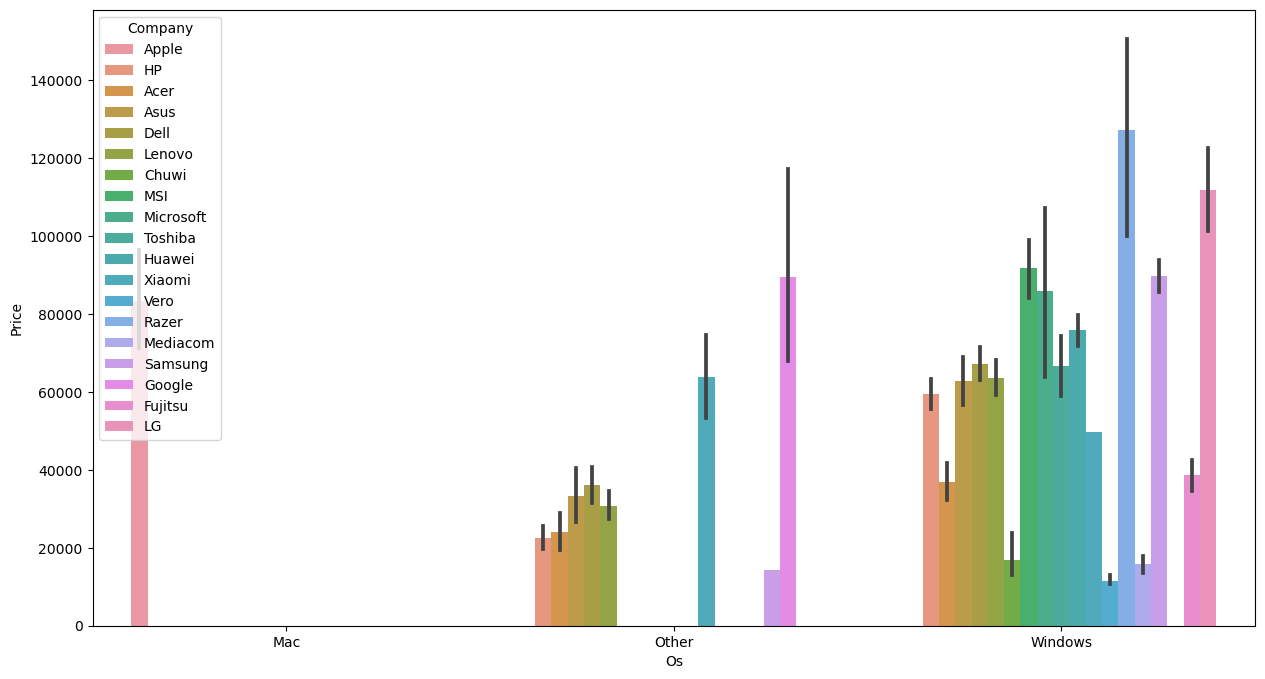

In [185]:
# bivarate analysis
plt.figure(figsize=(15,8))
sns.barplot(x='Os',y='Price',data=df,hue='Company')

<Axes: xlabel='Ram', ylabel='Price'>

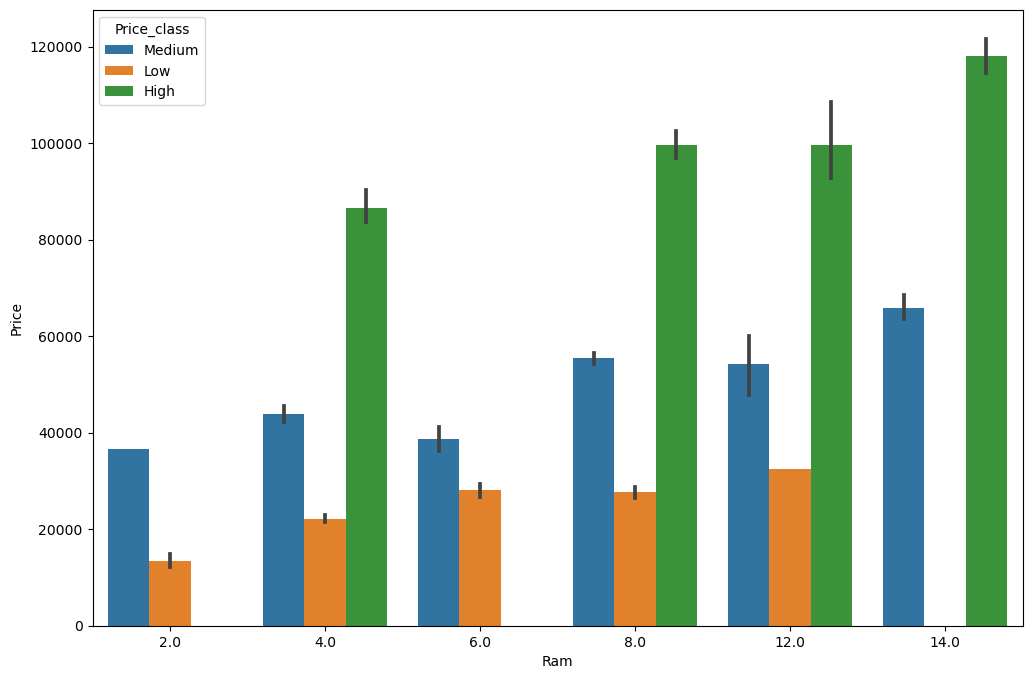

In [181]:
plt.figure(figsize=(12,8))
sns.barplot(x='Ram',y='Price',data=df,hue='Price_class')

In [182]:
plt.figure(figsize=(12,8))
px.bar(df, x='Company', y='Price', color='Ram')

<Figure size 1200x800 with 0 Axes>

In [186]:
df.select_dtypes(include=["object"])

Company            TypeName              Processor Price_class Gpu_brand  \
0      Apple           Ultrabook          Intel Core i5      Medium     Intel   
1      Apple           Ultrabook          Intel Core i5      Medium     Intel   
2         HP            Notebook          Intel Core i5         Low     Intel   
3      Apple           Ultrabook          Intel Core i7        High       AMD   
4      Apple           Ultrabook          Intel Core i5        High     Intel   
...      ...                 ...                    ...         ...       ...   
1269    Asus            Notebook          Intel Core i7      Medium    Nvidia   
1270  Lenovo  2 in 1 Convertible          Intel Core i7      Medium     Intel   
1271  Lenovo  2 in 1 Convertible          Intel Core i7        High     Intel   
1272  Lenovo            Notebook  Other Intel Processor         Low     Intel   
1273      HP            Notebook          Intel Core i7      Medium       AMD   

           Os  
0         Mac  
1         Mac  
2       Other  
3         Mac  
4         Mac  
...       ...  
1269  Windows  
1270  Windows  
1271  Windows  
1272  Windows  
1273  Windows  

[1243 rows x 6 columns]

In [ ]:
df1 =df.copy()

In [187]:
# nominal variable All are nominal variable
df1=pd.get_dummies(df,columns=["Company","TypeName","Processor","Price_class","Gpu_brand","Os"],drop_first=True)

In [188]:
df1.head()

Ram  Weight_kg        Price  Touchscreen  IPS  HDD  SSD  Flash Storage  \
0   8.0       1.37   71378.6832            0    1    0    1              0   
1   8.0       1.34   47895.5232            0    0    0    0              1   
2   8.0       1.86   30636.0000            0    0    0    1              0   
3  14.0       1.83  135195.3360            0    1    0    1              0   
4   8.0       1.37   96095.8080            0    1    0    1              0   

   Hybrid  Company_Apple  ...  Processor_Intel Core i5  \
0       0           True  ...                     True   
1       0           True  ...                     True   
2       0          False  ...                     True   
3       0           True  ...                    False   
4       0           True  ...                     True   

   Processor_Intel Core i7  Processor_Other Intel Processor  Price_class_Low  \
0                    False                            False            False   
1                    False                            False            False   
2                    False                            False             True   
3                     True                            False            False   
4                    False                            False            False   

   Price_class_Medium  Gpu_brand_Intel  Gpu_brand_Nvidia  Gpu_brand_nan  \
0                True             True             False          False   
1                True             True             False          False   
2               False             True             False          False   
3               False            False             False          False   
4               False             True             False          False   

   Os_Other  Os_Windows  
0     False       False  
1     False       False  
2      True       False  
3     False       False  
4     False       False  

[5 rows x 43 columns]

In [189]:
df1 = df1.astype(int)

In [190]:
df1

Ram  Weight_kg   Price  Touchscreen  IPS  HDD  SSD  Flash Storage  \
0       8          1   71378            0    1    0    1              0   
1       8          1   47895            0    0    0    0              1   
2       8          1   30636            0    0    0    1              0   
3      14          1  135195            0    1    0    1              0   
4       8          1   96095            0    1    0    1              0   
...   ...        ...     ...          ...  ...  ...  ...            ...   
1269    4          2   38378            0    0    1    0              0   
1270    4          1   33992            1    1    0    1              0   
1271   14          1   79866            1    1    0    1              0   
1272    2          1   12201            0    0    0    0              1   
1273    6          2   40705            0    0    1    0              0   

      Hybrid  Company_Apple  ...  Processor_Intel Core i5  \
0          0              1  ...                        1   
1          0              1  ...                        1   
2          0              0  ...                        1   
3          0              1  ...                        0   
4          0              1  ...                        1   
...      ...            ...  ...                      ...   
1269       0              0  ...                        0   
1270       0              0  ...                        0   
1271       0              0  ...                        0   
1272       0              0  ...                        0   
1273       0              0  ...                        0   

      Processor_Intel Core i7  Processor_Other Intel Processor  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           1                                0   
4                           0                                0   
...                       ...                              ...   
1269                        1                                0   
1270                        1                                0   
1271                        1                                0   
1272                        0                                1   
1273                        1                                0   

      Price_class_Low  Price_class_Medium  Gpu_brand_Intel  Gpu_brand_Nvidia  \
0                   0                   1                1                 0   
1                   0                   1                1                 0   
2                   1                   0                1                 0   
3                   0                   0                0                 0   
4                   0                   0                1                 0   
...               ...                 ...              ...               ...   
1269                0                   1                0                 1   
1270                0                   1                1                 0   
1271                0                   0                1                 0   
1272                1                   0                1                 0   
1273                0                   1                0                 0   

      Gpu_brand_nan  Os_Other  Os_Windows  
0                 0         0           0  
1                 0         0           0  
2                 0         1           0  
3                 0         0           0  
4                 0         0           0  
...             ...       ...         ...  
1269              0         0           1  
1270              0         0           1  
1271              0         0           1  
1272              0         0           1  
1273              0         0           1  

[1243 rows x 43 columns]

In [191]:
# Normalization- MinMaxScaler
df_norm=df1.copy()
from sklearn.preprocessing import MinMaxScaler
# StandardScaler- Class,
mm=MinMaxScaler()
scaled_values1=mm.fit_transform(df_norm)

In [192]:
new_df=pd.DataFrame(scaled_values1, columns=df1.columns)

In [193]:
new_df

Ram  Weight_kg     Price  Touchscreen  IPS  HDD  SSD  \
0     0.500000   0.333333  0.439588          0.0  1.0  0.0  1.0   
1     0.500000   0.333333  0.273380          0.0  0.0  0.0  0.0   
2     0.500000   0.333333  0.151224          0.0  0.0  0.0  1.0   
3     1.000000   0.333333  0.891271          0.0  1.0  0.0  1.0   
4     0.500000   0.333333  0.614529          0.0  1.0  0.0  1.0   
...        ...        ...       ...          ...  ...  ...  ...   
1238  0.166667   0.666667  0.206020          0.0  0.0  1.0  0.0   
1239  0.166667   0.333333  0.174977          1.0  1.0  0.0  1.0   
1240  1.000000   0.333333  0.499664          1.0  1.0  0.0  1.0   
1241  0.000000   0.333333  0.020745          0.0  0.0  0.0  0.0   
1242  0.333333   0.666667  0.222490          0.0  0.0  1.0  0.0   

      Flash Storage  Hybrid  Company_Apple  ...  Processor_Intel Core i5  \
0               0.0     0.0            1.0  ...                      1.0   
1               1.0     0.0            1.0  ...                      1.0   
2               0.0     0.0            0.0  ...                      1.0   
3               0.0     0.0            1.0  ...                      0.0   
4               0.0     0.0            1.0  ...                      1.0   
...             ...     ...            ...  ...                      ...   
1238            0.0     0.0            0.0  ...                      0.0   
1239            0.0     0.0            0.0  ...                      0.0   
1240            0.0     0.0            0.0  ...                      0.0   
1241            1.0     0.0            0.0  ...                      0.0   
1242            0.0     0.0            0.0  ...                      0.0   

      Processor_Intel Core i7  Processor_Other Intel Processor  \
0                         0.0                              0.0   
1                         0.0                              0.0   
2                         0.0                              0.0   
3                         1.0                              0.0   
4                         0.0                              0.0   
...                       ...                              ...   
1238                      1.0                              0.0   
1239                      1.0                              0.0   
1240                      1.0                              0.0   
1241                      0.0                              1.0   
1242                      1.0                              0.0   

      Price_class_Low  Price_class_Medium  Gpu_brand_Intel  Gpu_brand_Nvidia  \
0                 0.0                 1.0              1.0               0.0   
1                 0.0                 1.0              1.0               0.0   
2                 1.0                 0.0              1.0               0.0   
3                 0.0                 0.0              0.0               0.0   
4                 0.0                 0.0              1.0               0.0   
...               ...                 ...              ...               ...   
1238              0.0                 1.0              0.0               1.0   
1239              0.0                 1.0              1.0               0.0   
1240              0.0                 0.0              1.0               0.0   
1241              1.0                 0.0              1.0               0.0   
1242              0.0                 1.0              0.0               0.0   

      Gpu_brand_nan  Os_Other  Os_Windows  
0               0.0       0.0         0.0  
1               0.0       0.0         0.0  
2               0.0       1.0         0.0  
3               0.0       0.0         0.0  
4               0.0       0.0         0.0  
...             ...       ...         ...  
1238            0.0       0.0         1.0  
1239            0.0       0.0         1.0  
1240            0.0       0.0         1.0  
1241            0.0       0.0         1.0  
1242            0.0       0.0         1.0  

[1243 rows

In [194]:
new_df.describe()

Ram    Weight_kg        Price  Touchscreen          IPS  \
count  1243.000000  1243.000000  1243.000000  1243.000000  1243.000000   
mean      0.486457     0.538750     0.357752     0.144006     0.280772   
std       0.285042     0.216503     0.243505     0.351238     0.449557   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.166667     0.333333     0.165475     0.000000     0.000000   
50%       0.500000     0.666667     0.307339     0.000000     0.000000   
75%       0.500000     0.666667     0.499289     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               HDD          SSD  Flash Storage       Hybrid  Company_Apple  \
count  1243.000000  1243.000000    1243.000000  1243.000000    1243.000000   
mean      0.440064     0.497989       0.053902     0.006436       0.016895   
std       0.496595     0.500197       0.225915     0.079999       0.128928   
min       0.000000     0.000000       0.000000     0.000000       0.000000   
25%       0.000000     0.000000       0.000000     0.000000       0.000000   
50%       0.000000     0.000000       0.000000     0.000000       0.000000   
75%       1.000000     1.000000       0.000000     0.000000       0.000000   
max       1.000000     1.000000       1.000000     1.000000       1.000000   

       ...  Processor_Intel Core i5  Processor_Intel Core i7  \
count  ...              1243.000000              1243.000000   
mean   ...                 0.329043                 0.404666   
std    ...                 0.470055                 0.491025   
min    ...                 0.000000                 0.000000   
25%    ...                 0.000000                 0.000000   
50%    ...                 0.000000                 0.000000   
75%    ...                 1.000000                 1.000000   
max    ...                 1.000000                 1.000000   

       Processor_Other Intel Processor  Price_class_Low  Price_class_Medium  \
count                      1243.000000      1243.000000         1243.000000   
mean                          0.111022         0.250201            0.498793   
std                           0.314285         0.433303            0.500200   
min                           0.000000         0.000000            0.000000   
25%                           0.000000         0.000000            0.000000   
50%                           0.000000         0.000000            0.000000   
75%                           0.000000         0.500000            1.000000   
max                           1.000000         1.000000            1.000000   

       Gpu_brand_Intel  Gpu_brand_Nvidia  Gpu_brand_nan     Os_Other  \
count      1243.000000       1243.000000    1243.000000  1243.000000   
mean          0.549477          0.312953       0.000805     0.119067   
std           0.497746          0.463882       0.028364     0.323997   
min           0.000000          0.000000       0.000000     0.000000   
25%           0.000000          0.000000       0.000000     0.000000   
50%           1.000000          0.000000       0.000000     0.000000   
75%           1.000000          1.000000       0.000000     0.000000   
max           1.000000          1.000000       1.000000     1.000000   

        Os_Windows  
count  1243.000000  
mean      0.864039  
std       0.342886  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 43 columns]

In [195]:
new_df.corr()

Ram  Weight_kg     Price  Touchscreen  \
Ram                              1.000000   0.211099  0.736335     0.129404   
Weight_kg                        0.211099   1.000000  0.076961    -0.244614   
Price                            0.736335   0.076961  1.000000     0.193320   
Touchscreen                      0.129404  -0.244614  0.193320     1.000000   
IPS                              0.229714  -0.022257  0.265704     0.136358   
HDD                             -0.024225   0.499031 -0.171985    -0.238983   
SSD                              0.126399  -0.387752  0.274788     0.237667   
Flash Storage                   -0.230386  -0.253995 -0.219049     0.013714   
Hybrid                          -0.007944   0.032076 -0.030767    -0.033012   
Company_Apple                    0.042746  -0.172503  0.089360    -0.053769   
Company_Asus                     0.074045   0.149464 -0.004399    -0.052606   
Company_Chuwi                   -0.045615  -0.046687 -0.061602    -0.020175   
Company_Dell                     0.094317   0.073568  0.055245     0.112489   
Company_Fujitsu                 -0.021574   0.023728 -0.024796    -0.016466   
Company_Google                   0.031110  -0.046687  0.042293     0.119921   
Company_HP                      -0.143328  -0.143880 -0.037797    -0.070095   
Company_Huawei                   0.001908  -0.038105  0.018741    -0.016466   
Company_LG                       0.031110  -0.071940  0.074399     0.073222   
Company_Lenovo                  -0.033673  -0.024819 -0.031059     0.034132   
Company_MSI                      0.226645   0.130872  0.196361    -0.086561   
Company_Mediacom                -0.090753  -0.071431 -0.096500    -0.000246   
Company_Microsoft               -0.003480  -0.066106  0.052831     0.169799   
Company_Razer                    0.116772  -0.005195  0.147761     0.091616   
Company_Samsung                  0.062674  -0.091890  0.048015     0.024298   
Company_Toshiba                 -0.000447  -0.064729  0.039954    -0.021243   
Company_Vero                    -0.072081  -0.053931 -0.079688    -0.023305   
Company_Xiaomi                   0.027628  -0.053931  0.000949    -0.023305   
TypeName_Gaming                  0.471664   0.465619  0.373319    -0.150218   
TypeName_Netbook                -0.114966  -0.127409 -0.088884    -0.020300   
TypeName_Notebook               -0.479095   0.076766 -0.586188    -0.375164   
TypeName_Ultrabook               0.152496  -0.426094  0.289239     0.107099   
TypeName_Workstation             0.091519   0.124189  0.248132    -0.033034   
Processor_Intel Core i3         -0.313549   0.087097 -0.308915    -0.081879   
Processor_Intel Core i5         -0.182048  -0.147807 -0.113691    -0.019013   
Processor_Intel Core i7          0.635542   0.176786  0.591449     0.096006   
Processor_Other Intel Processor -0.326232  -0.193439 -0.316832     0.022808   
Price_class_Low                 -0.540780   0.021016 -0.619255    -0.131127   
Price_class_Medium              -0.018468  -0.042318 -0.181518    -0.083792   
Gpu_brand_Intel                 -0.338135  -0.542677 -0.169597     0.256262   
Gpu_brand_Nvidia                 0.427879   0.489776  0.338874    -0.168107   
Gpu_brand_nan                    0.001349   0.016772 -0.005877    -0.011638   
Os_Other                        -0.190311   0.025998 -0.296794    -0.080041   
Os_Windows                       0.163755   0.040298  0.246845     0.095849   

                                      IPS       HDD       SSD  Flash Storage  \
Ram                              0.229714 -0.024225  0.126399      -0.230386   
Weight_kg                       -0.022257  0.499031 -0.387752      -0.253995   
Price                            0.265704 -0.171985  0.274788      -0.219049   
Touchscreen                      0.136358 -0.238983  0.237667       0.013714   
IPS                              1.000000 -0.131936  0.140365       0.001492   
HDD                             -0.131936  1.000000 -0.882962      -0.211603   
S

In [196]:
# importing necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [197]:
# =============================================================================
# MODEL BUILDING WITH DATA
# =============================================================================

# Separating input and output features
x1 = new_df.drop(['Price'], axis='columns', inplace=False)
y1 = new_df['Price']


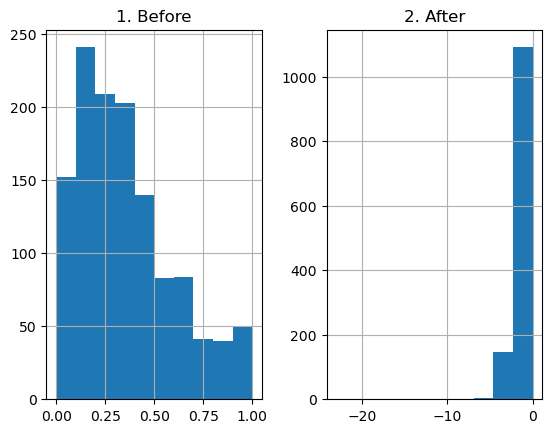

In [198]:
# Assuming y1 is your price variable
prices = pd.DataFrame({"1. Before": y1})

# Adding a small constant to avoid zero values
epsilon = 1e-10  # or any small positive value
prices["2. After"] = np.log(prices["1. Before"] + epsilon)

# Plotting the histogram
prices.hist()
plt.show()  # Display the plot

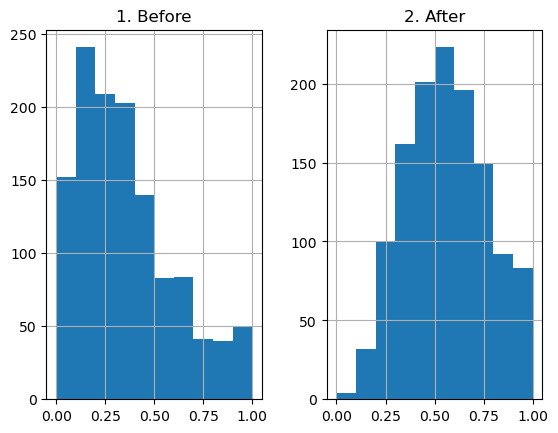

In [199]:
prices = pd.DataFrame({"1. Before": y1})
prices["2. After"] = np.sqrt(prices["1. Before"] + epsilon)
# Plotting the histogram
prices.hist()
plt.show()  # Display the plot

In [200]:
# Transforming price as a square root value
y1 = np.sqrt(y1)

In [201]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(870, 42) (373, 42) (870,) (373,)


In [202]:
X_train

Ram  Weight_kg  Touchscreen  IPS  HDD  SSD  Flash Storage  Hybrid  \
913   0.500000   0.666667          0.0  0.0  1.0  0.0            0.0     0.0   
712   0.833333   0.666667          0.0  0.0  1.0  0.0            0.0     0.0   
1233  0.000000   0.666667          0.0  0.0  1.0  0.0            0.0     0.0   
155   0.166667   0.666667          0.0  0.0  1.0  0.0            0.0     0.0   
1178  0.500000   1.000000          0.0  0.0  1.0  0.0            0.0     0.0   
...        ...        ...          ...  ...  ...  ...            ...     ...   
1021  1.000000   1.000000          0.0  1.0  1.0  0.0            0.0     0.0   
789   1.000000   0.666667          0.0  0.0  1.0  0.0            0.0     0.0   
256   0.166667   0.666667          0.0  0.0  1.0  0.0            0.0     0.0   
968   0.500000   0.333333          0.0  0.0  0.0  1.0            0.0     0.0   
952   1.000000   0.666667          1.0  0.0  1.0  0.0            0.0     0.0   

      Company_Apple  Company_Asus  ...  Processor_Intel Core i5  \
913             0.0           0.0  ...                      0.0   
712             0.0           0.0  ...                      1.0   
1233            0.0           0.0  ...                      0.0   
155             0.0           1.0  ...                      0.0   
1178            0.0           0.0  ...                      0.0   
...             ...           ...  ...                      ...   
1021            0.0           0.0  ...                      0.0   
789             0.0           0.0  ...                      0.0   
256             0.0           0.0  ...                      1.0   
968             0.0           1.0  ...                      1.0   
952             0.0           1.0  ...                      0.0   

      Processor_Intel Core i7  Processor_Other Intel Processor  \
913                       1.0                              0.0   
712                       0.0                              0.0   
1233                      0.0                              1.0   
155                       0.0                              0.0   
1178                      0.0                              0.0   
...                       ...                              ...   
1021                      1.0                              0.0   
789                       1.0                              0.0   
256                       0.0                              0.0   
968                       0.0                              0.0   
952                       1.0                              0.0   

      Price_class_Low  Price_class_Medium  Gpu_brand_Intel  Gpu_brand_Nvidia  \
913               0.0                 1.0              0.0               1.0   
712               0.0                 1.0              1.0               0.0   
1233              1.0                 0.0              1.0               0.0   
155               1.0                 0.0              0.0               0.0   
1178              0.0                 1.0              0.0               1.0   
...               ...                 ...              ...               ...   
1021              0.0                 0.0              0.0               1.0   
789               0.0                 0.0              0.0               1.0   
256               0.0                 1.0              1.0               0.0   
968               0.0                 1.0              1.0               0.0   
952               0.0                 0.0              0.0               1.0   

      Gpu_brand_nan  Os_Other  Os_Windows  
913             0.0       0.0         1.0  
712             0.0       0.0         1.0  
1233            0.0       0.0         1.0  
155             0.0       0.0         1.0  
1178            0.0       0.0         1.0  
...             ...       ...         ...  
1021            0.0       0.0         1.0  
789             0.0       0.0         1.0  
256             0.0       0.0         1.0  
968             0.0       0.0         1.0  
952    

In [203]:
X_test

Ram  Weight_kg  Touchscreen  IPS  HDD  SSD  Flash Storage  Hybrid  \
648   0.333333   0.666667          0.0  0.0  1.0  0.0            0.0     0.0   
539   0.166667   0.666667          0.0  0.0  0.0  1.0            0.0     0.0   
505   0.166667   0.666667          1.0  0.0  1.0  0.0            0.0     0.0   
874   0.500000   0.666667          0.0  0.0  1.0  0.0            0.0     0.0   
946   0.500000   0.333333          1.0  0.0  0.0  1.0            0.0     0.0   
...        ...        ...          ...  ...  ...  ...            ...     ...   
898   0.166667   0.666667          0.0  0.0  1.0  0.0            0.0     0.0   
1110  1.000000   1.000000          0.0  0.0  1.0  0.0            0.0     0.0   
1069  0.500000   0.666667          0.0  0.0  0.0  1.0            0.0     0.0   
407   0.500000   0.333333          0.0  0.0  0.0  1.0            0.0     0.0   
506   1.000000   0.666667          0.0  0.0  0.0  1.0            0.0     0.0   

      Company_Apple  Company_Asus  ...  Processor_Intel Core i5  \
648             0.0           0.0  ...                      0.0   
539             0.0           0.0  ...                      0.0   
505             0.0           0.0  ...                      1.0   
874             0.0           0.0  ...                      0.0   
946             0.0           0.0  ...                      0.0   
...             ...           ...  ...                      ...   
898             0.0           0.0  ...                      1.0   
1110            0.0           0.0  ...                      0.0   
1069            0.0           0.0  ...                      0.0   
407             0.0           0.0  ...                      0.0   
506             0.0           1.0  ...                      0.0   

      Processor_Intel Core i7  Processor_Other Intel Processor  \
648                       0.0                              0.0   
539                       0.0                              0.0   
505                       0.0                              0.0   
874                       1.0                              0.0   
946                       1.0                              0.0   
...                       ...                              ...   
898                       0.0                              0.0   
1110                      1.0                              0.0   
1069                      1.0                              0.0   
407                       1.0                              0.0   
506                       1.0                              0.0   

      Price_class_Low  Price_class_Medium  Gpu_brand_Intel  Gpu_brand_Nvidia  \
648               1.0                 0.0              0.0               0.0   
539               1.0                 0.0              1.0               0.0   
505               1.0                 0.0              1.0               0.0   
874               0.0                 1.0              0.0               1.0   
946               0.0                 0.0              1.0               0.0   
...               ...                 ...              ...               ...   
898               0.0                 1.0              0.0               0.0   
1110              0.0                 0.0              0.0               1.0   
1069              0.0                 0.0              0.0               1.0   
407               0.0                 0.0              1.0               0.0   
506               0.0                 0.0              0.0               1.0   

      Gpu_brand_nan  Os_Other  Os_Windows  
648             0.0       0.0         1.0  
539             0.0       0.0         1.0  
505             0.0       0.0         1.0  
874             0.0       1.0         0.0  
946             0.0       0.0         1.0  
...             ...       ...         ...  
898             0.0       0.0         1.0  
1110            0.0       0.0         1.0  
1069            0.0       0.0         1.0  
407             0.0       0.0         1.0  
506    

In [204]:
y_train

913     0.621717
712     0.423231
1233    0.278048
155     0.293864
1178    0.414231
          ...   
1021    0.893281
789     0.919291
256     0.426779
968     0.606679
952     0.782812
Name: Price, Length: 870, dtype: float64

In [205]:
y_test

648     0.371001
539     0.350084
505     0.361982
874     0.533590
946     0.821361
          ...   
898     0.438976
1110    0.916001
1069    0.733058
407     0.707139
506     1.000000
Name: Price, Length: 373, dtype: float64

In [206]:
from sklearn import metrics

In [207]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [208]:
y_pred=lr.predict(X_test)

In [209]:
y_pred

array([0.34194286, 0.34720234, 0.36921026, 0.56093351, 0.80700885,
       0.8692713 , 0.5447695 , 0.33375228, 0.63952274, 0.60002611,
       0.55468768, 0.52159678, 0.37569556, 0.55570428, 0.5025002 ,
       0.55523445, 0.49032434, 0.23726688, 0.25974625, 0.5627628 ,
       0.49895287, 0.56218529, 0.87405931, 0.54285039, 0.56975643,
       0.20488901, 0.58030406, 0.59331138, 0.52942866, 0.53364565,
       0.88249597, 0.80342637, 0.5039497 , 0.33832932, 0.86793932,
       0.29348219, 0.51212698, 0.582589  , 0.34946176, 0.58107797,
       0.51967408, 0.28991328, 0.4785943 , 0.59432798, 0.86145882,
       0.86575454, 0.31693017, 0.58523635, 0.28245356, 0.58000047,
       0.72960314, 0.49029204, 0.58893259, 0.80960957, 0.59662834,
       0.25607155, 0.81263152, 0.53622463, 0.46543745, 0.56959494,
       0.59432798, 0.32858047, 0.59611136, 0.54147277, 0.47278135,
       0.80219993, 0.46164006, 0.50282622, 0.3198198 , 0.85211341,
       0.23668091, 0.79341266, 0.50384588, 0.59331138, 0.80486

In [210]:
metrics.r2_score(y_test,y_pred)

0.8940037626560676

**R-squared value of 0.89 means that approximately 89% of the variance in the dependent variable (y_test) is predictable from the independent variables (X) in  model. This indicates a strong fit of the regression model to the data.**

# =============================================================================
# RANDOM FOREST WITH DATA
# =============================================================================

In [214]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [215]:
# Predict on the testing data
y_pred = rf_regressor.predict(X_test)
y_pred

array([0.36262154, 0.34724915, 0.35587472, 0.56747151, 0.7749286 ,
       0.99332698, 0.63567488, 0.30566115, 0.5953426 , 0.64215857,
       0.58112298, 0.46378707, 0.35429624, 0.55346605, 0.5168805 ,
       0.53811198, 0.53454132, 0.23919669, 0.27040071, 0.6437729 ,
       0.45002746, 0.58248483, 0.86475031, 0.47919214, 0.52522947,
       0.25653742, 0.66435426, 0.60019783, 0.59829965, 0.61989703,
       0.96212003, 0.80789985, 0.53601991, 0.31592452, 0.86479766,
       0.30823293, 0.53140819, 0.59207638, 0.36230169, 0.57569399,
       0.47271142, 0.30869437, 0.44223818, 0.62046097, 0.8312398 ,
       0.77252133, 0.29395677, 0.53097405, 0.25243711, 0.55504005,
       0.74175582, 0.4582793 , 0.679512  , 0.83989674, 0.57708456,
       0.31682966, 0.82369396, 0.57141246, 0.44927103, 0.58143703,
       0.62046097, 0.35697802, 0.63777572, 0.52307655, 0.47201291,
       0.79878907, 0.43250976, 0.47876698, 0.3258323 , 0.79954687,
       0.26156648, 0.74410559, 0.50292783, 0.60019783, 0.75684

In [217]:
# Calculate R-squared score
metrics.r2_score(y_test,y_pred)

0.9101832035949414

**R-squared value of 0.91 means that approximately 91% of the variance in the dependent variable (y_test) is predictable from the independent variables (X) in model. This indicates a strong fit of the regression model to the data.**

# =============================================================================
# XGBRegressor with DATA
# =============================================================================

In [222]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 245.8 kB/s eta 0:06:46
   ---------------------------------------- 0.1/99.8 MB 272.3 kB/s eta 0:06:07
   ---------------------------------------- 0.1/99.8 MB 350.1 kB/s eta 0:04:45
   ---------------------------------------- 0.1/99.8 MB 344.8 kB/s eta 0:04:49
   ---------------------------------------- 0.2/99.8 MB 446.5 kB/s eta 0:03:44
   ---------------------------------------

In [223]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [225]:
# Predict on the testing data
y_pred = xgb_regressor.predict(X_test)

In [226]:
metrics.r2_score(y_test,y_pred)

0.9091480155211884

**R-squared value of 0.90 means that approximately 91% of the variance in the dependent variable (y_test) is predictable from the independent variables (X) in model. This indicates a strong fit of the regression model to the data.**

In [230]:
X_test['Price'] = df['Price']

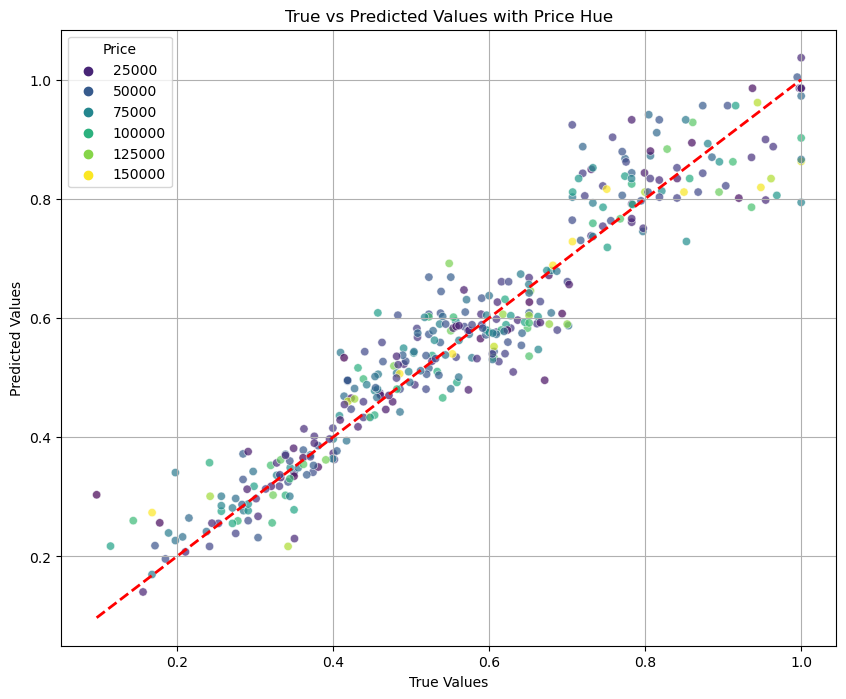

In [231]:
# Combine y_test and y_pred into a DataFrame
df_plot = pd.DataFrame({'True_Values': y_test, 'Predicted_Values': y_pred, 'Price': X_test['Price']})


plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x='True_Values', y='Predicted_Values', hue='Price', palette='viridis', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Diagonal line
plt.title('True vs Predicted Values with Price Hue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend(title='Price')
plt.grid(True)
plt.show()


In [236]:
df_plot['Ram'] = new_df['Ram']

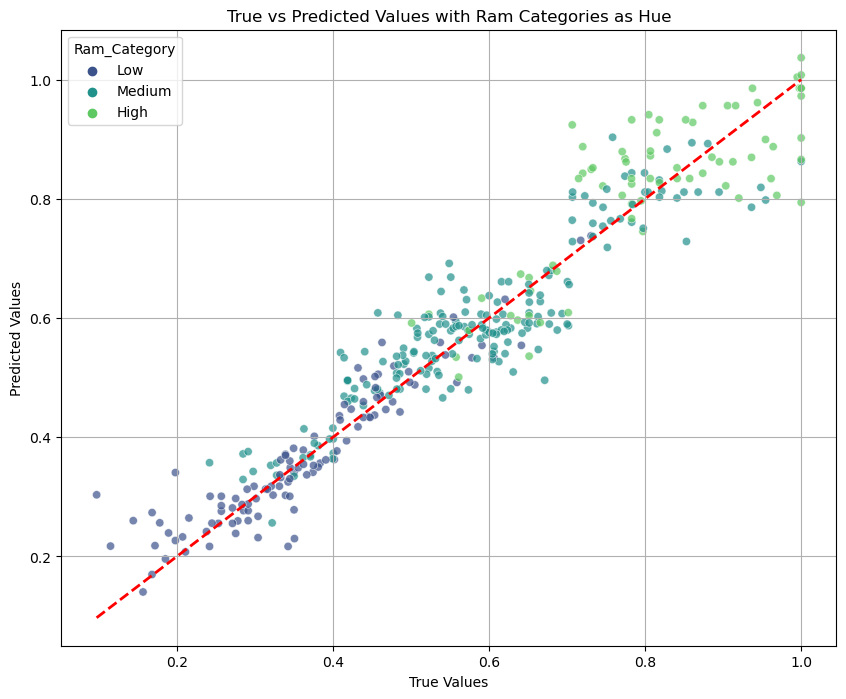

In [237]:
# Binning the 'Ram' column into categories
df_plot['Ram_Category'] = pd.cut(df_plot['Ram'], bins=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 8))
# Using hue to represent the 'Ram' categories
sns.scatterplot(data=df_plot, x='True_Values', y='Predicted_Values', hue='Ram_Category', palette='viridis', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Diagonal line
plt.title('True vs Predicted Values with Ram Categories as Hue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
